In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scanpy as sc
import palettable
import anndata as ad
import scanpy.external as sce

# settings

In [2]:
sc.set_figure_params(vector_friendly=False,format='pdf',transparent=True,dpi=200)

sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cls_cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors

### plot_matrix

In [12]:
def plot_matrix(mat):
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(mat,annot=True,ax=ax)
    plt.gca().set_aspect('equal', adjustable='box') 

# data loading

In [13]:
data_path = 'simulation_data/'

data_file = 'simulation4.h5ad'
adata = ad.read_h5ad(data_path+data_file)


In [ ]:
adata.obs['gt_ct'].cat.reorder_categories(['group '+str(i+1) for i in range(5)],inplace=True)

In [15]:
adata.obs['gt_ct']

Cell8107-0    group 1
Cell2200-0    group 1
Cell205-0     group 1
Cell2255-0    group 1
Cell4990-0    group 1
               ...   
Cell2795-4    group 5
Cell742-4     group 5
Cell8133-4    group 5
Cell955-4     group 5
Cell6556-4    group 5
Name: gt_ct, Length: 2000, dtype: category
Categories (5, object): ['group 1', 'group 2', 'group 3', 'group 4', 'group 5']

In [16]:
sc.pp.pca(adata,n_comps=50)
sc.pp.neighbors(adata,n_pcs=50,n_neighbors=15)
sc.tl.umap(adata)

## pca

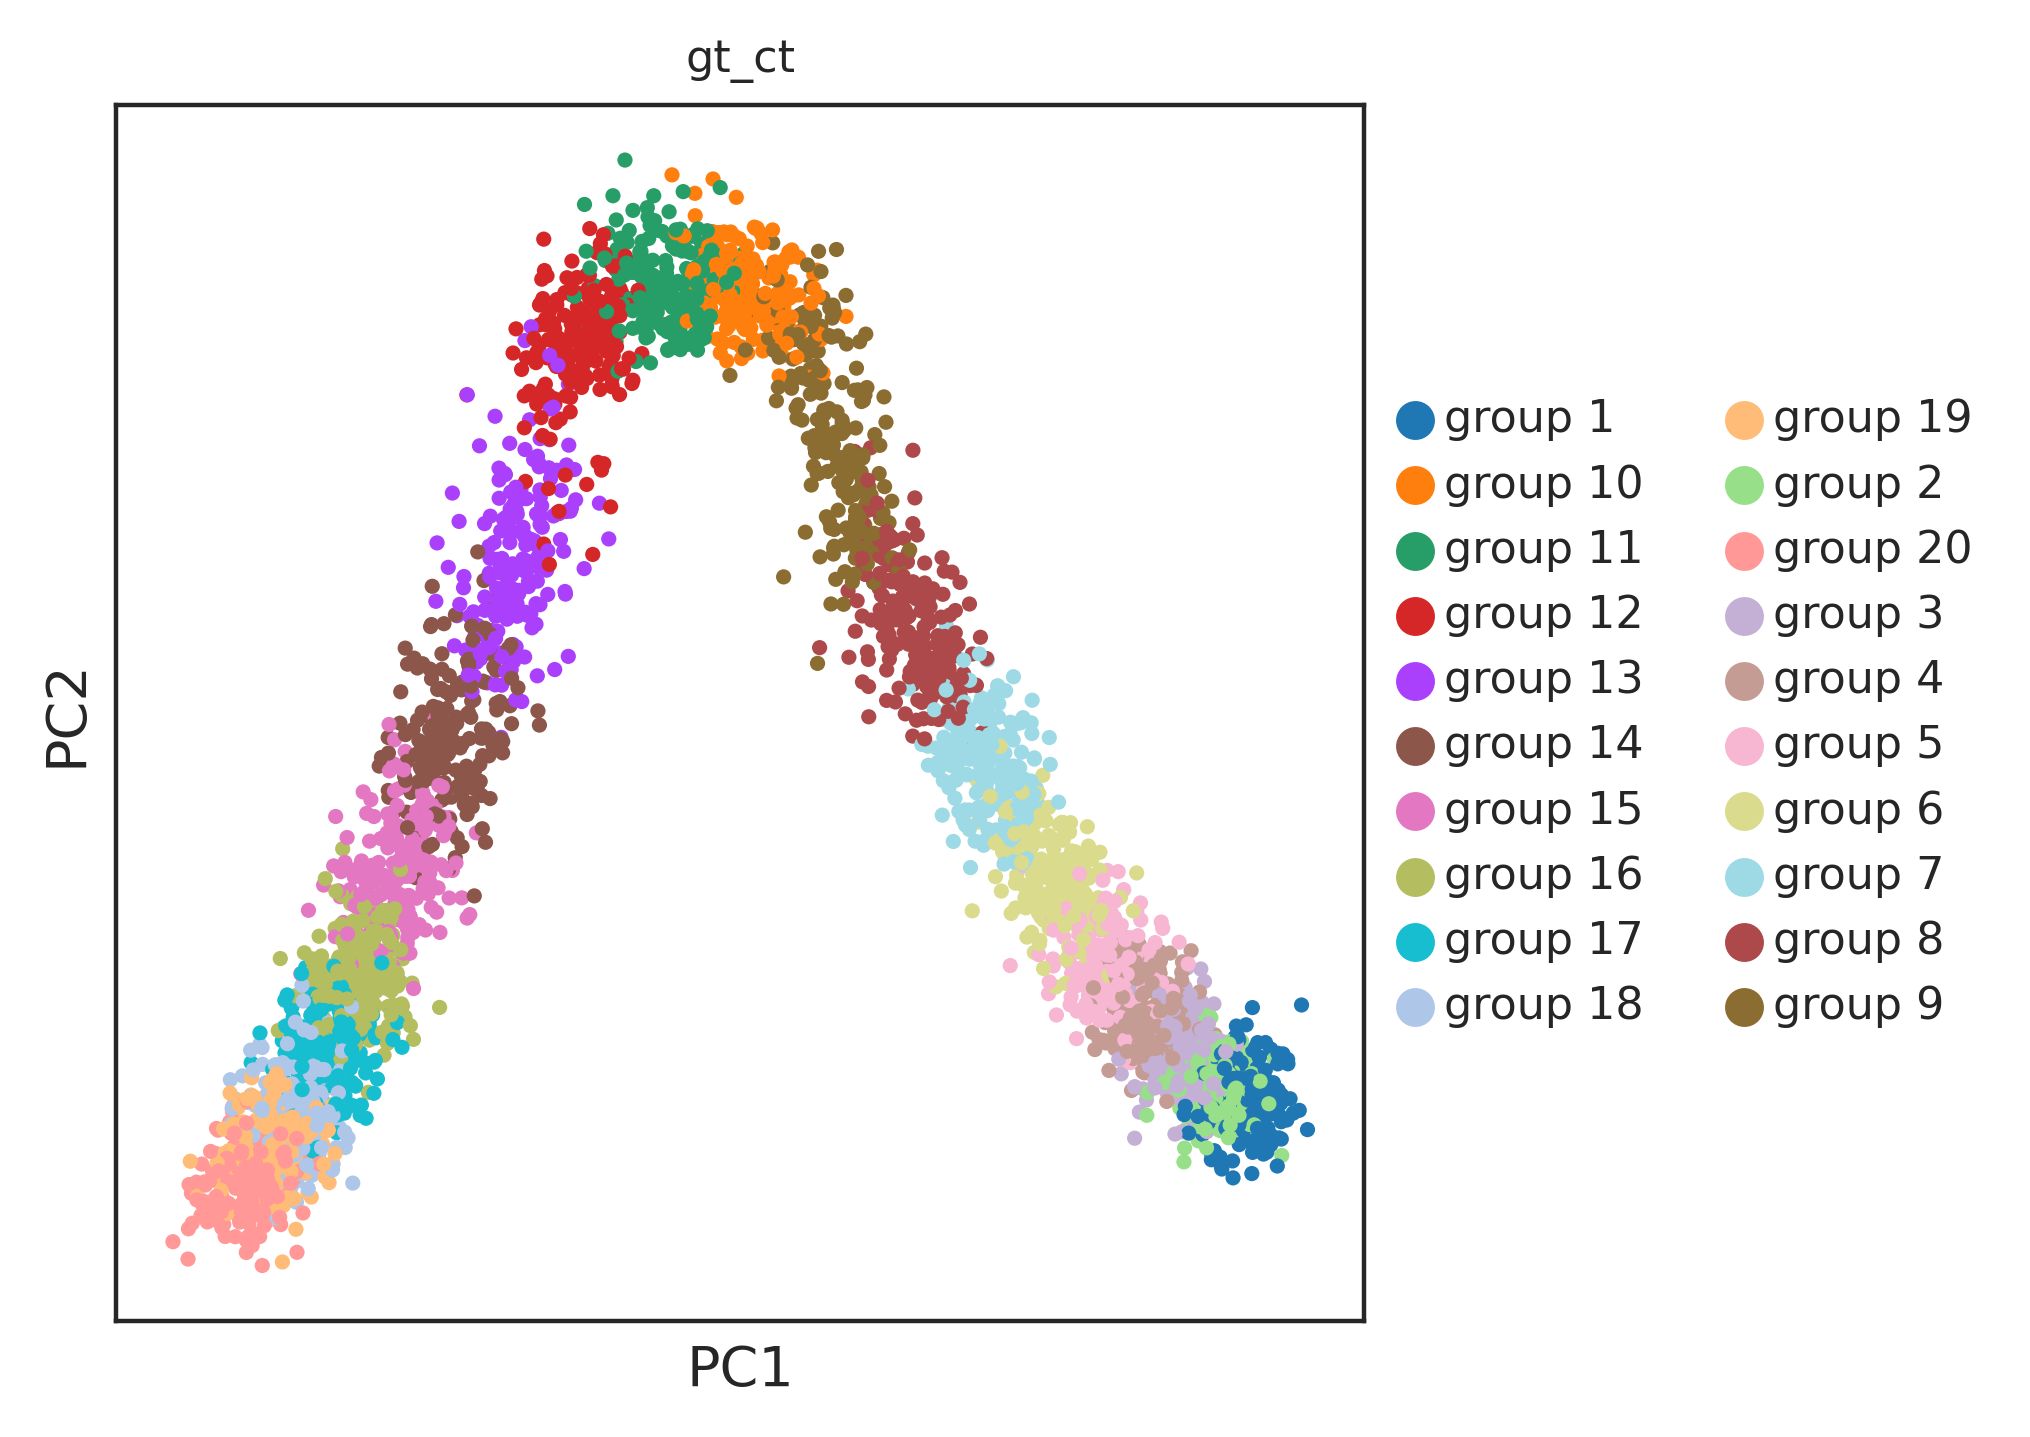

In [19]:
sc.pl.pca(adata,color=['gt_ct'])

## phate

In [105]:
import phate
phate_op = phate.PHATE(n_jobs=-1,n_pca=999)
data_phate = phate_op.fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 4000 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.87 seconds.
    Calculating affinities...
    Calculated affinities in 2.05 seconds.
  Calculated graph and diffusion operator in 4.90 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.85 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.24 seconds.
  Calculated landmark operator in 5.23 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.89 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.37 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.55 seconds.
Calculated PHATE in 15.96 seconds.


In [106]:
phate_cls = phate.cluster.kmeans(phate_op,n_clusters=20)

In [107]:
adata.obsm['X_phate'] = data_phate
adata.obs['phate_cls'] = phate_cls.astype('str')
adata.obs['phate_cls'] = adata.obs['phate_cls'].astype('category')

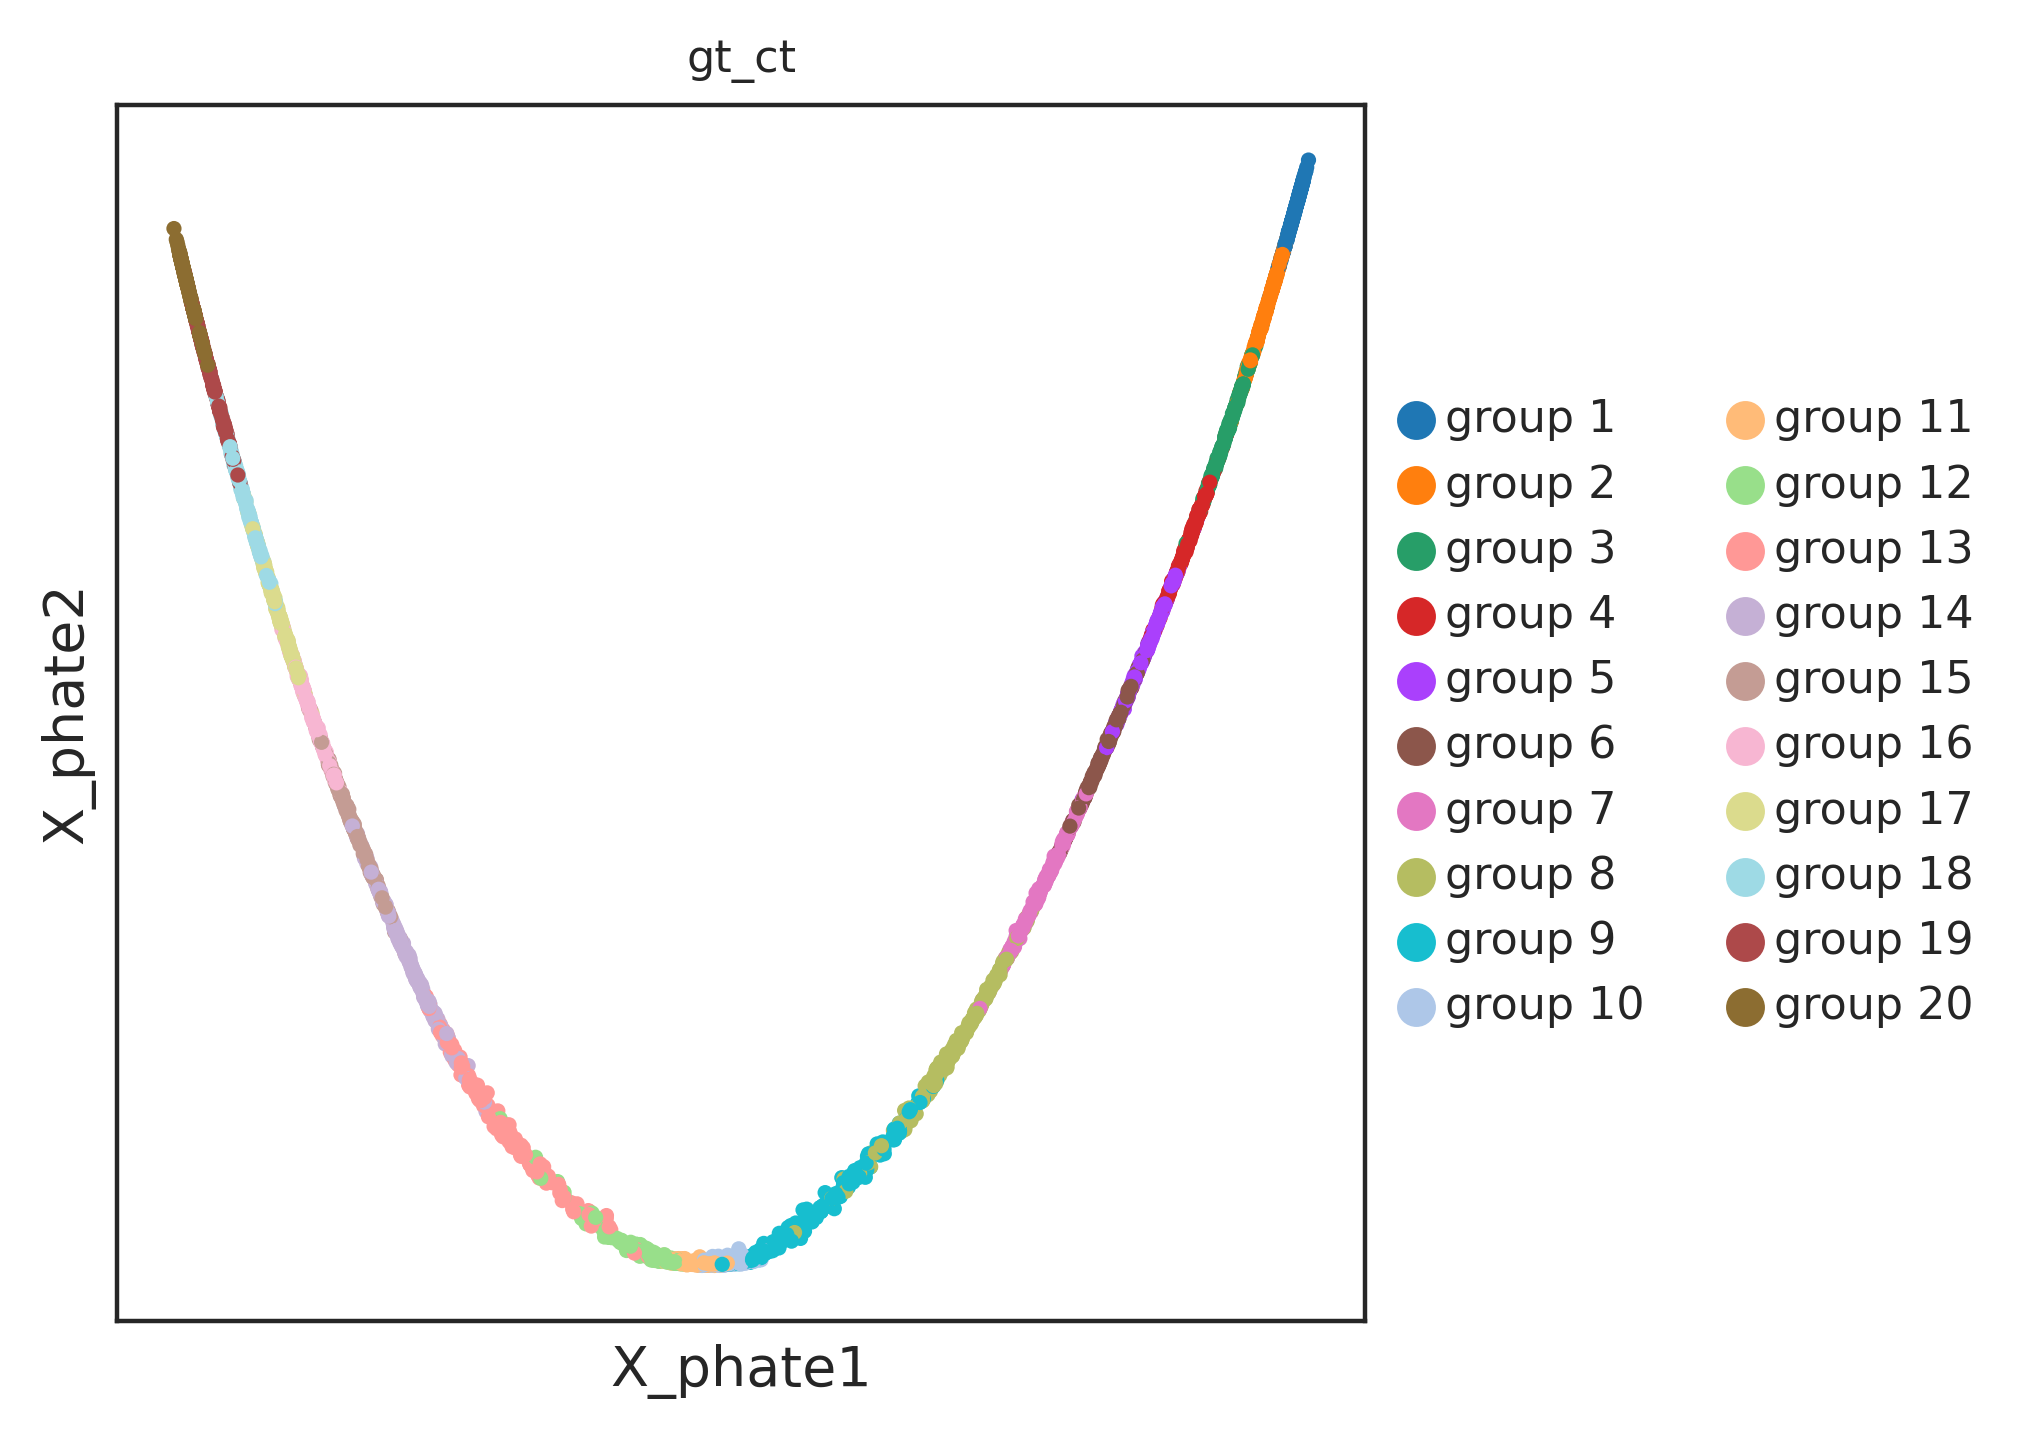

In [108]:
sc.pl.embedding(adata,basis='X_phate',color=['gt_ct'])

## dpt

In [22]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [23]:
sc.tl.diffmap(adata)

In [27]:
adata.uns['iroot'] = 0

In [28]:
sc.tl.dpt(adata)

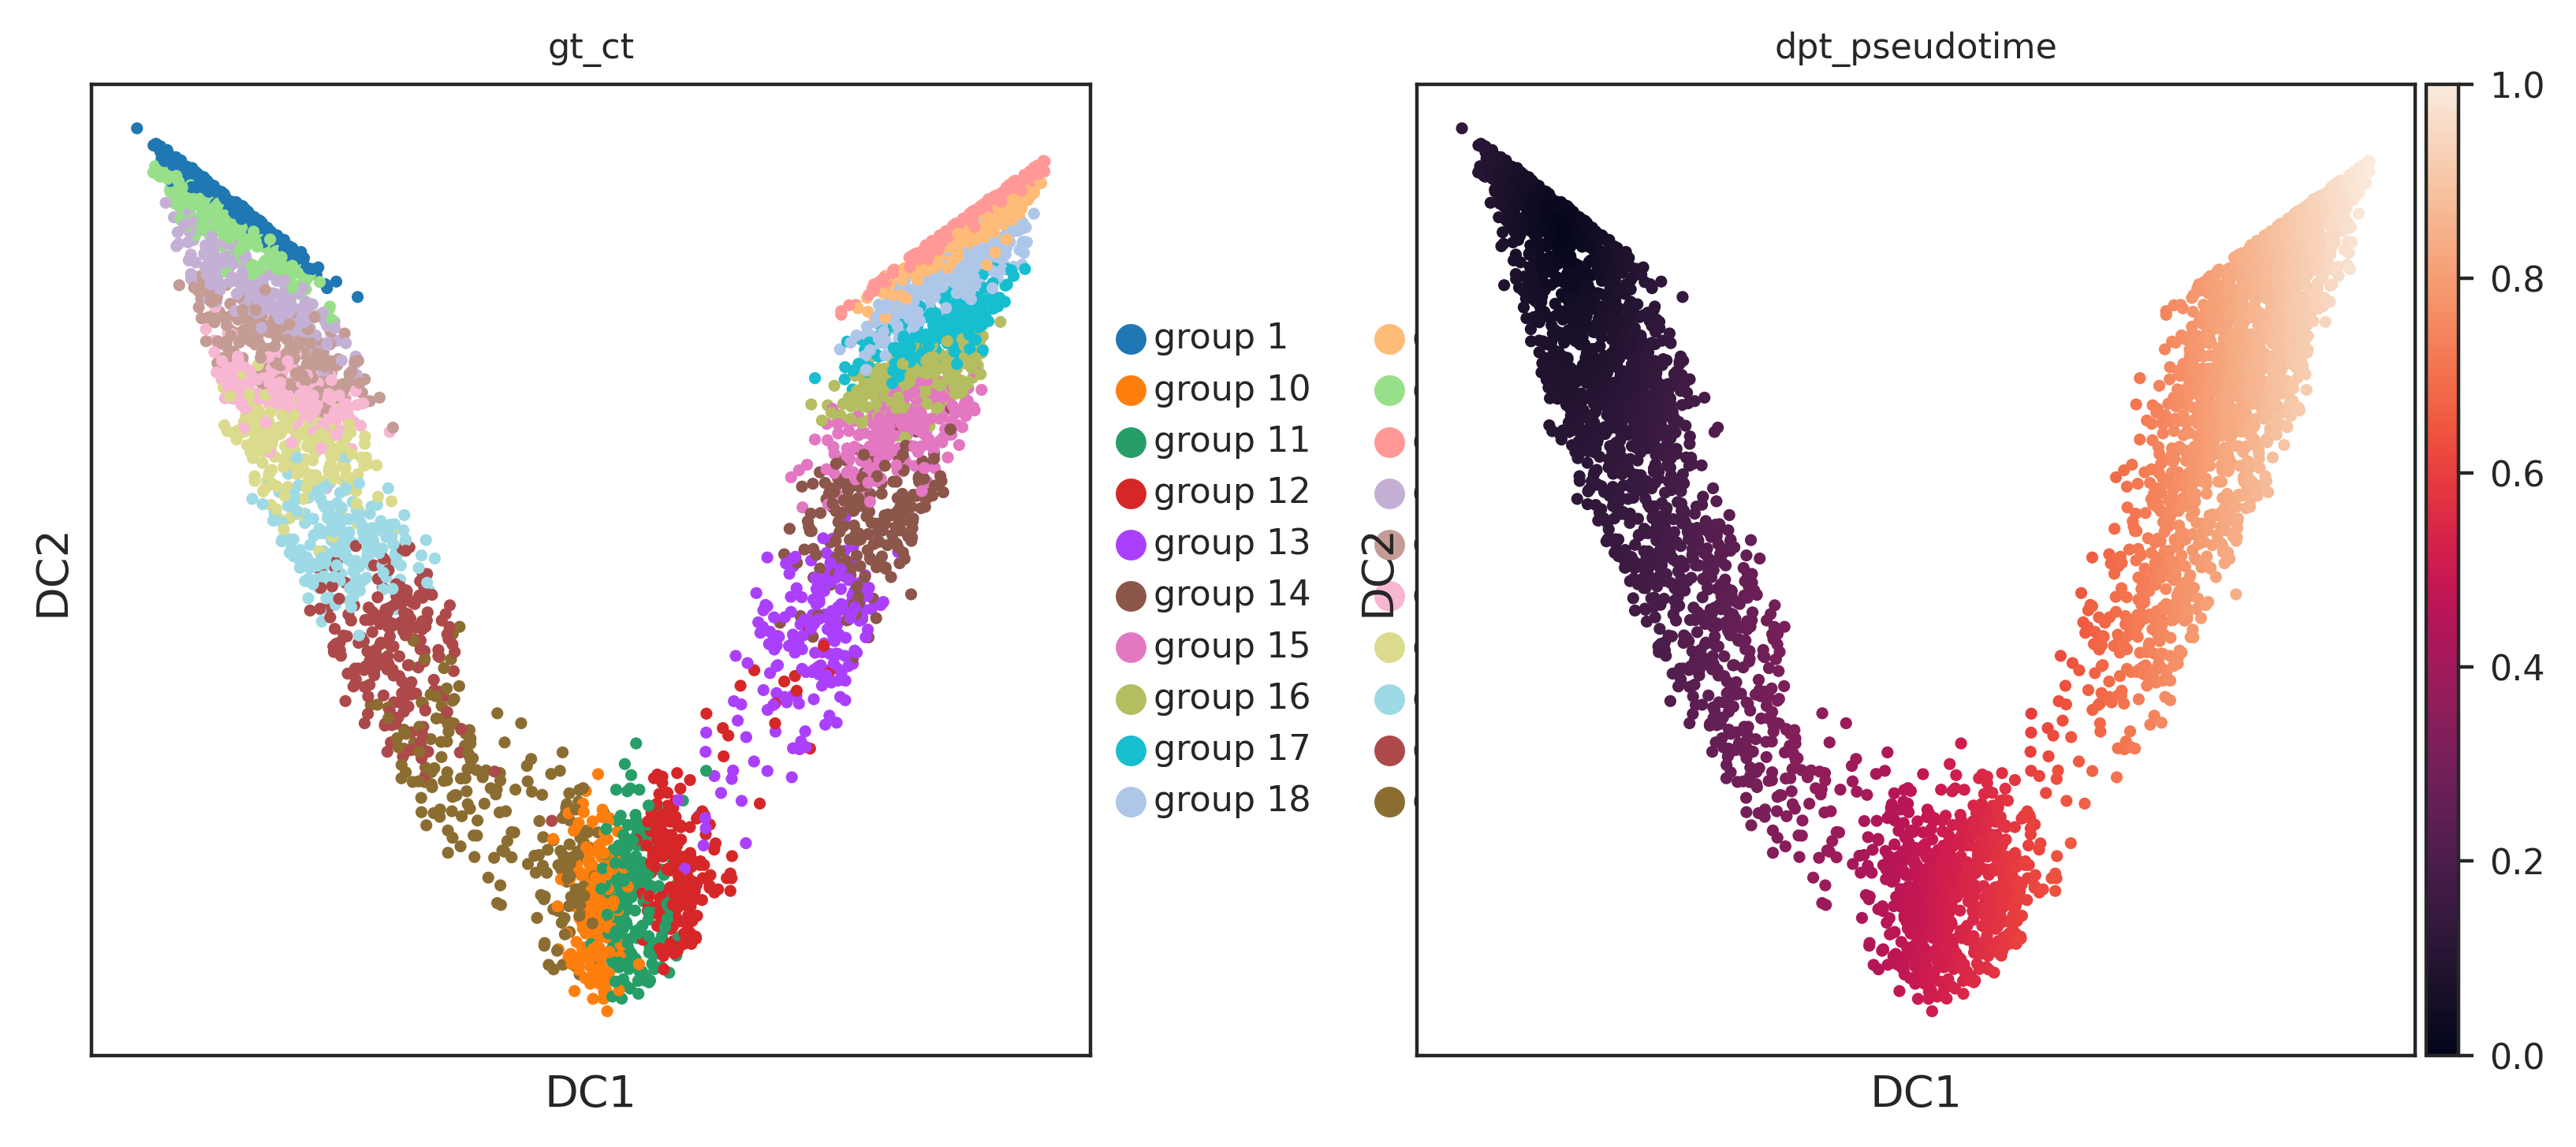

In [29]:
sc.pl.diffmap(adata,color=['gt_ct','dpt_pseudotime'])

## paga

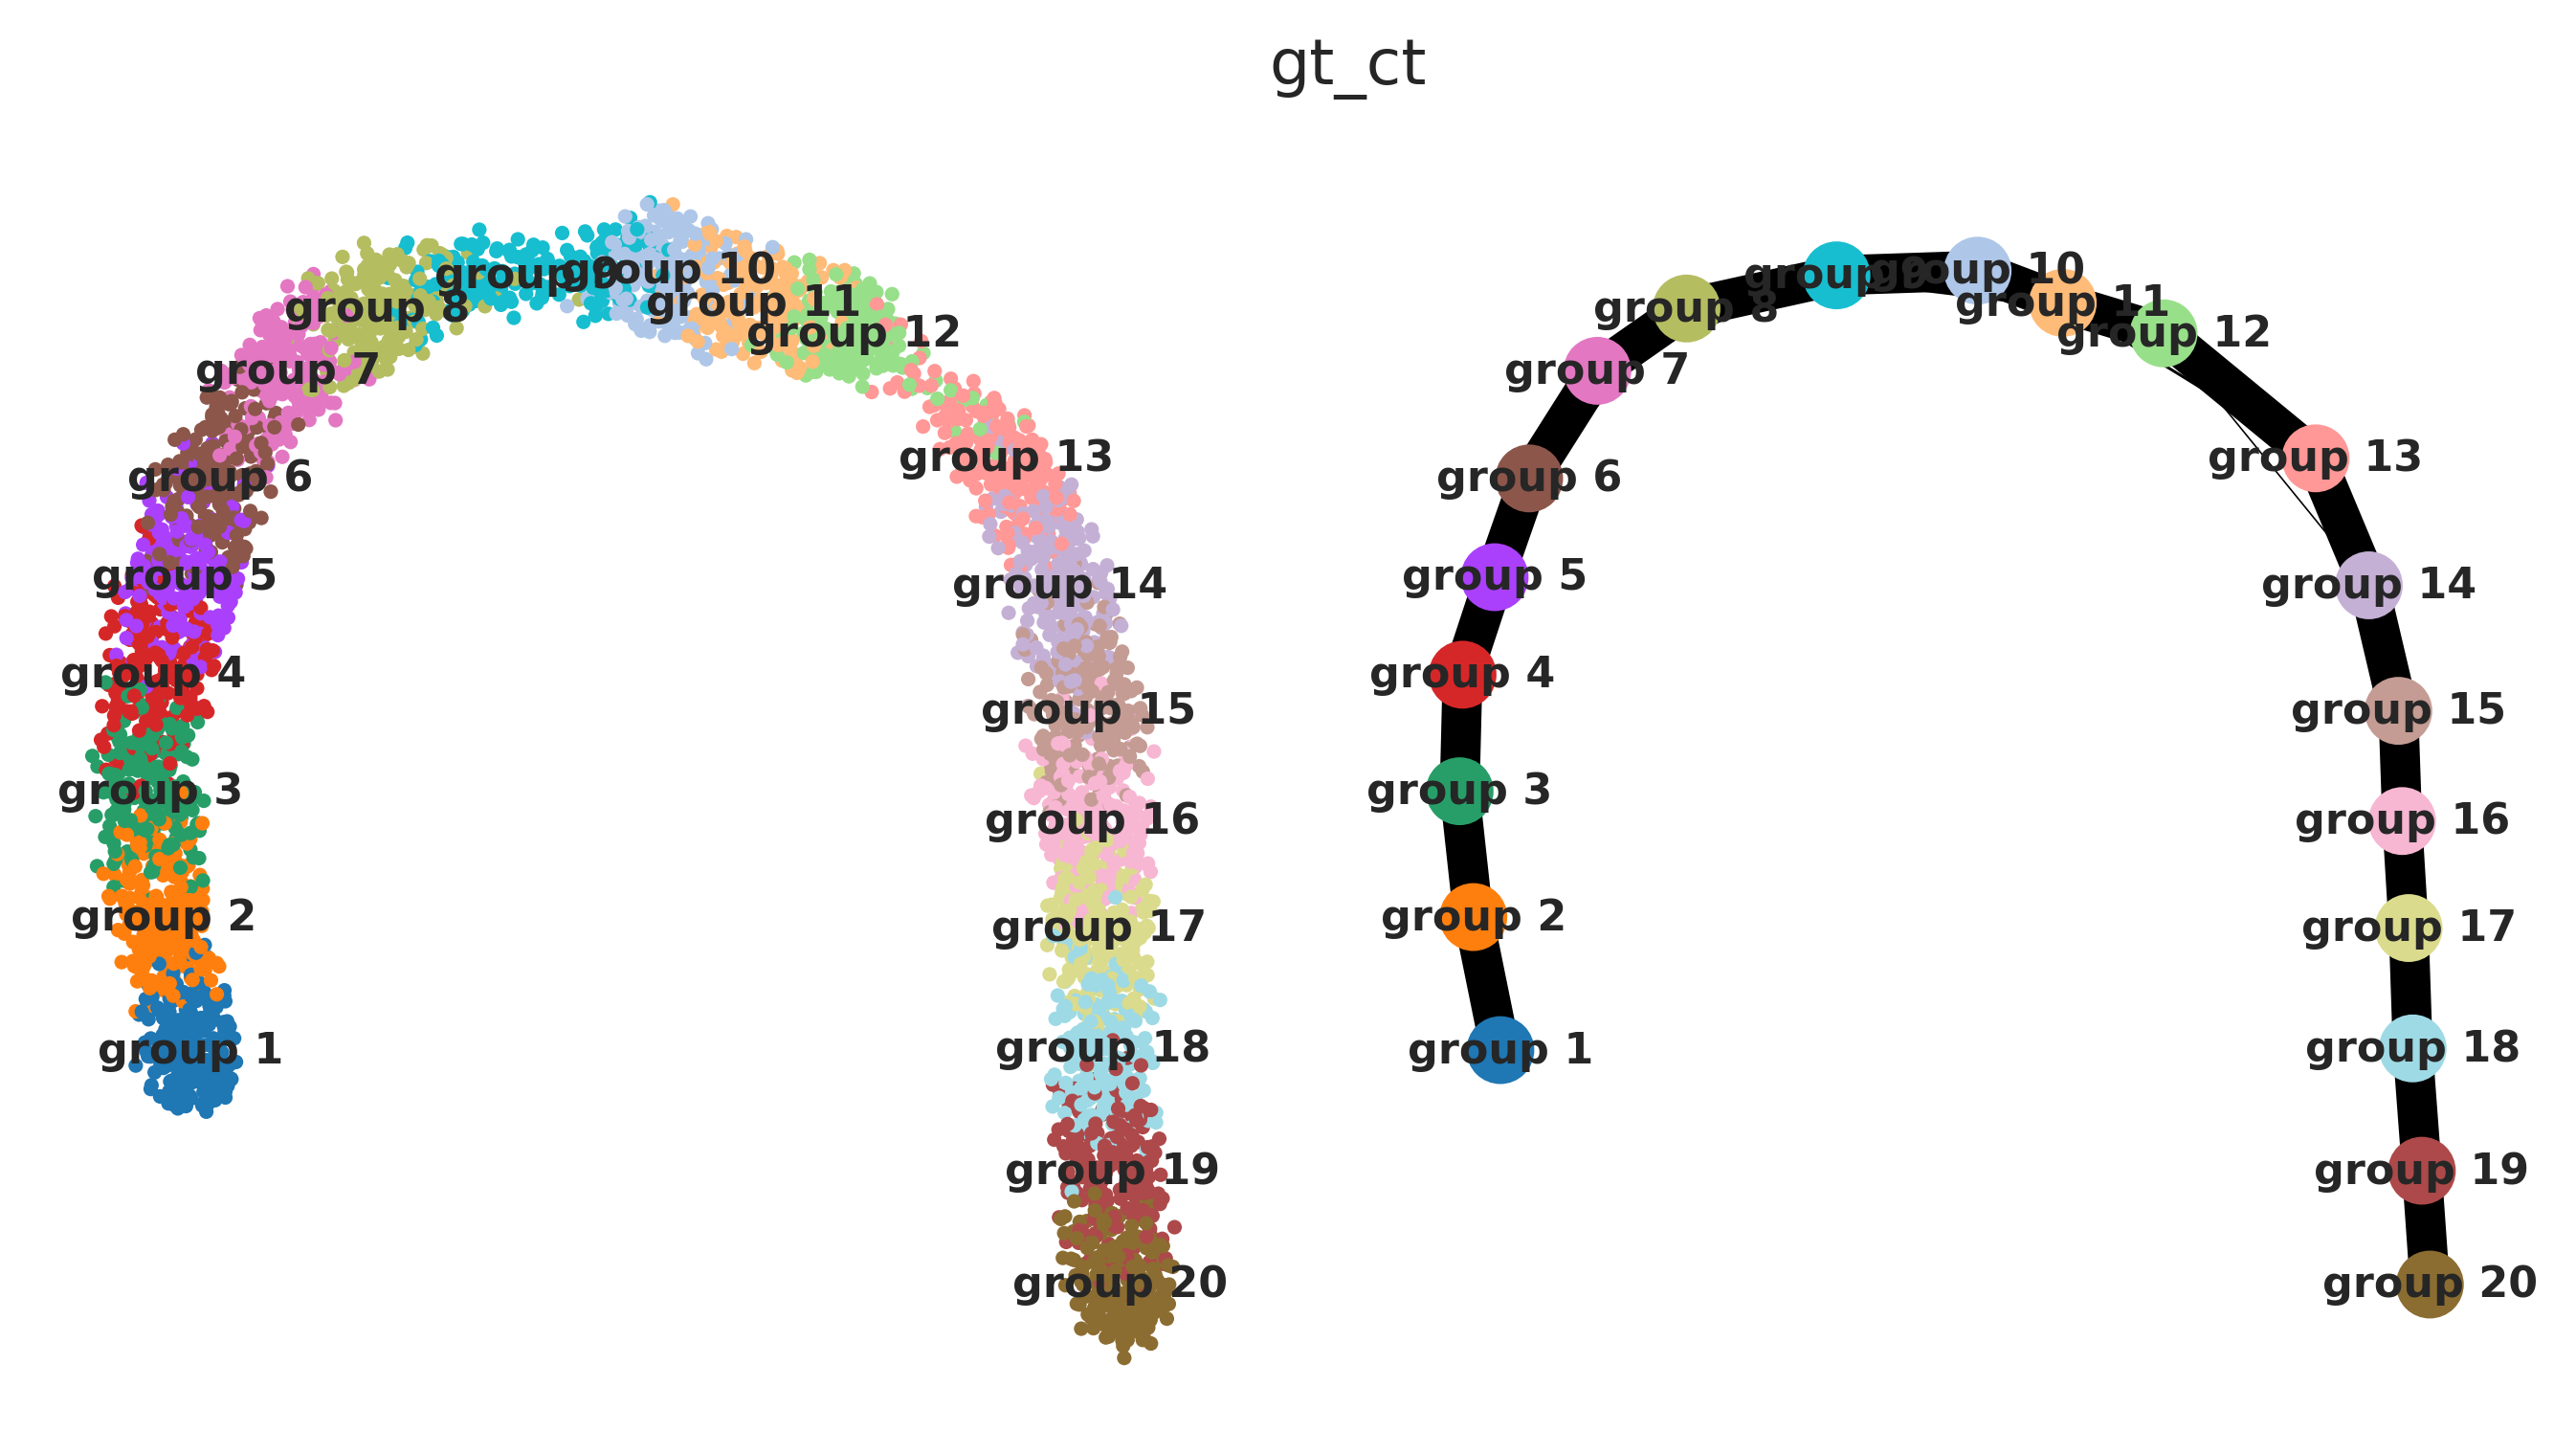

In [57]:
################################################### PAGA partition ################################################### 
### calculate PAGA distance
cls_key = 'gt_ct'
sc.tl.paga(adata,groups=cls_key,neighbors_key='neighbors')
### plot PAGA tree
sc.pl.paga_compare(adata,basis='X_umap')




## paga umap

In [58]:
sc.tl.umap(adata,init_pos='paga')
# sc.tl.umap(adata,init_pos='random')

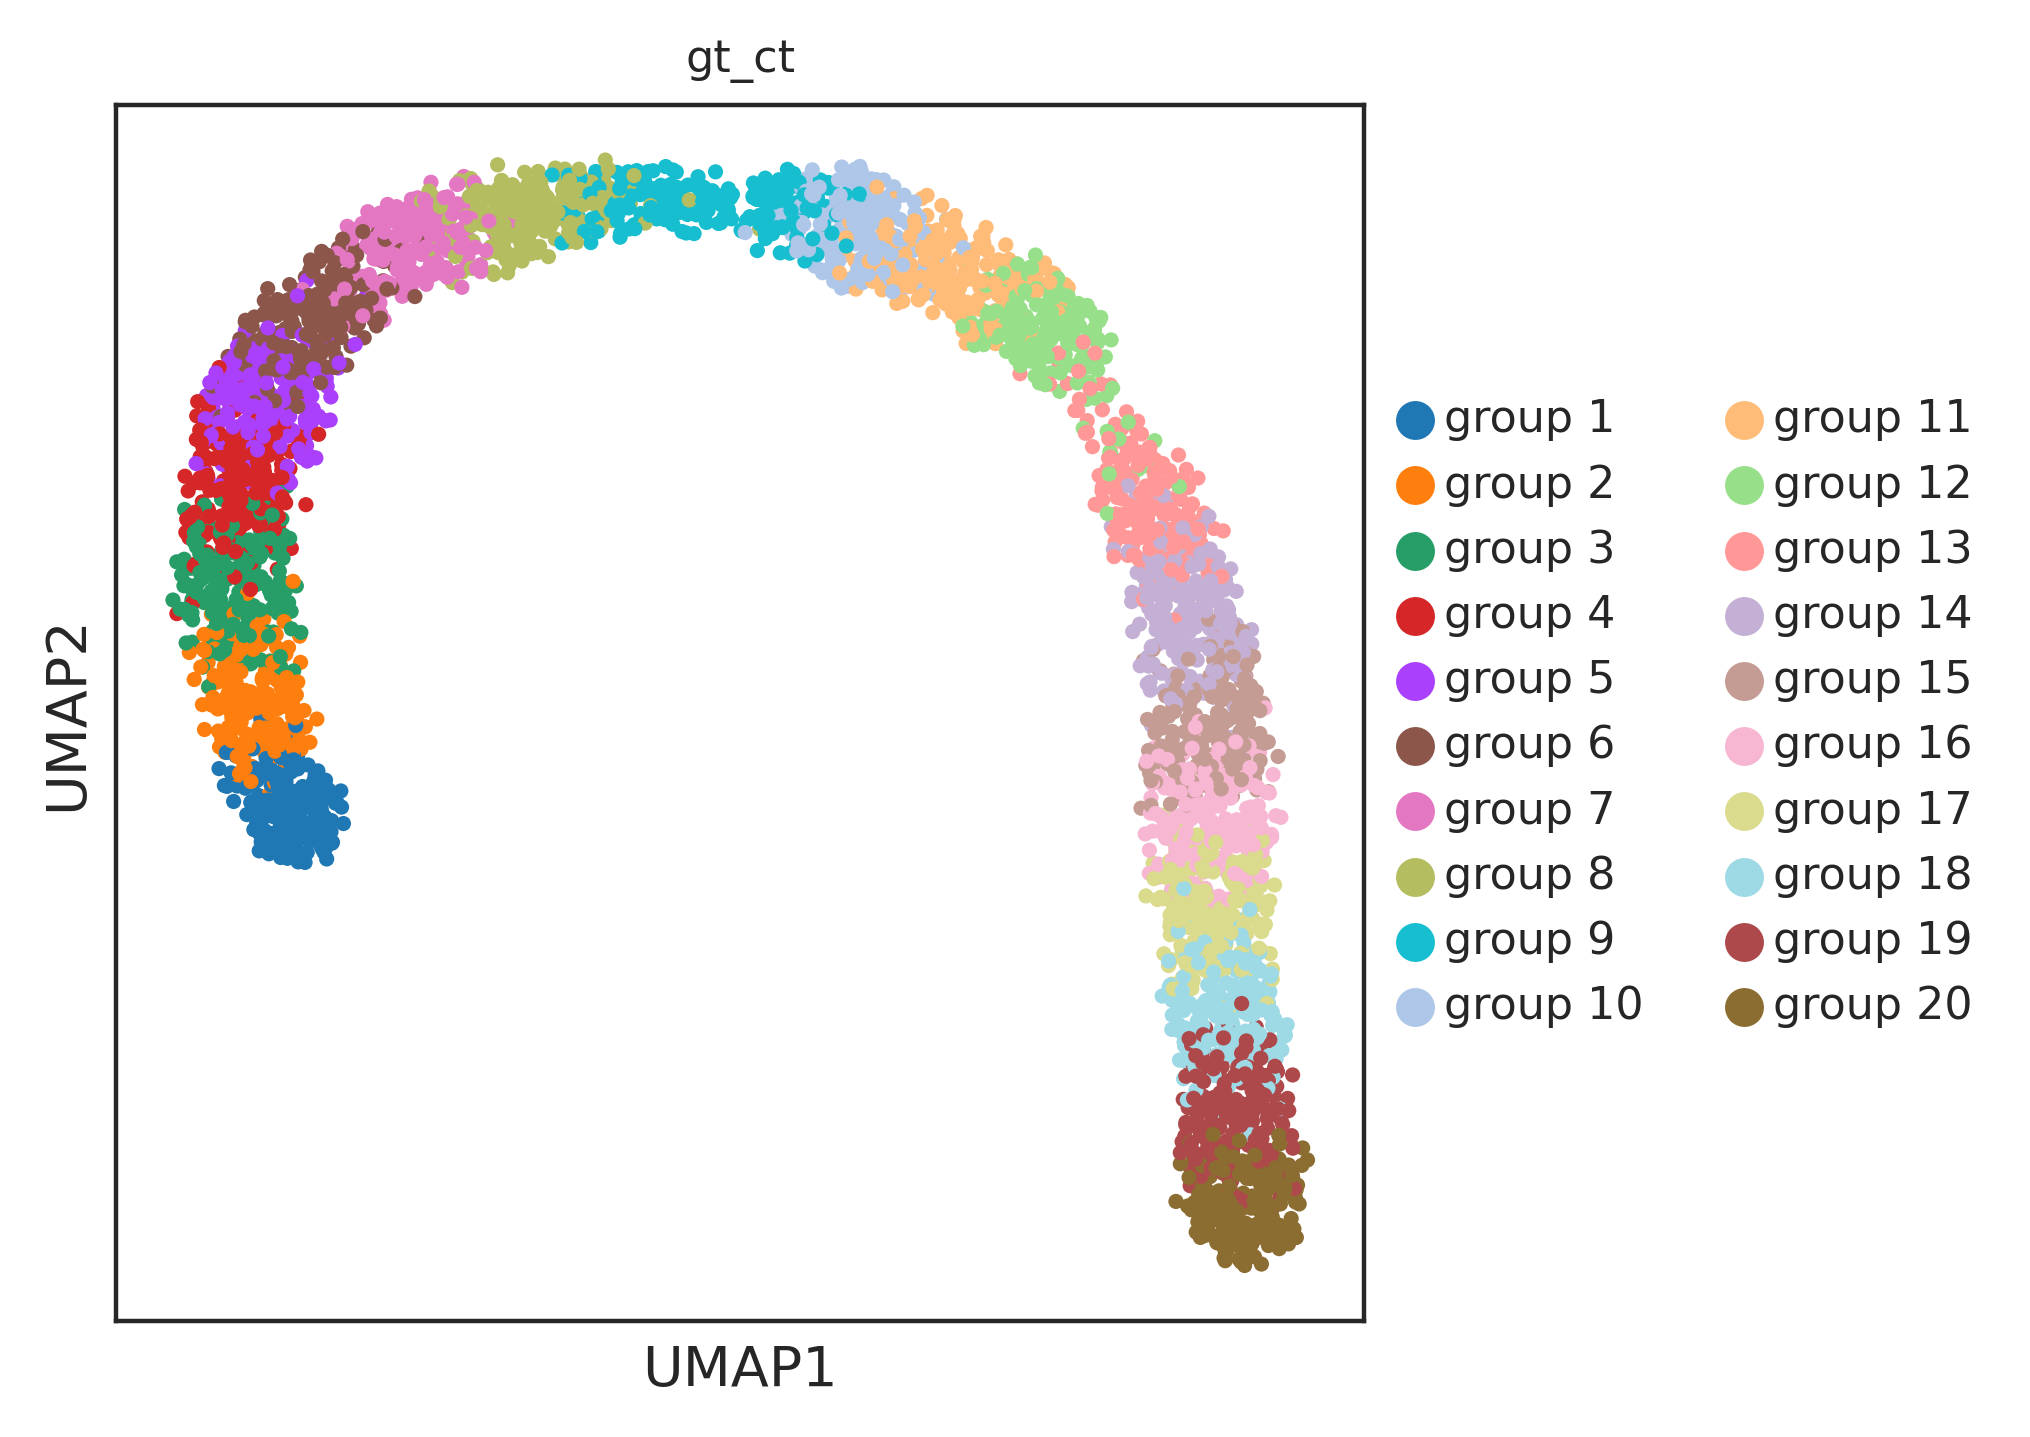

In [59]:
sc.pl.umap(adata,color=['gt_ct'])

## fa

In [17]:
sc.tl.draw_graph(adata)

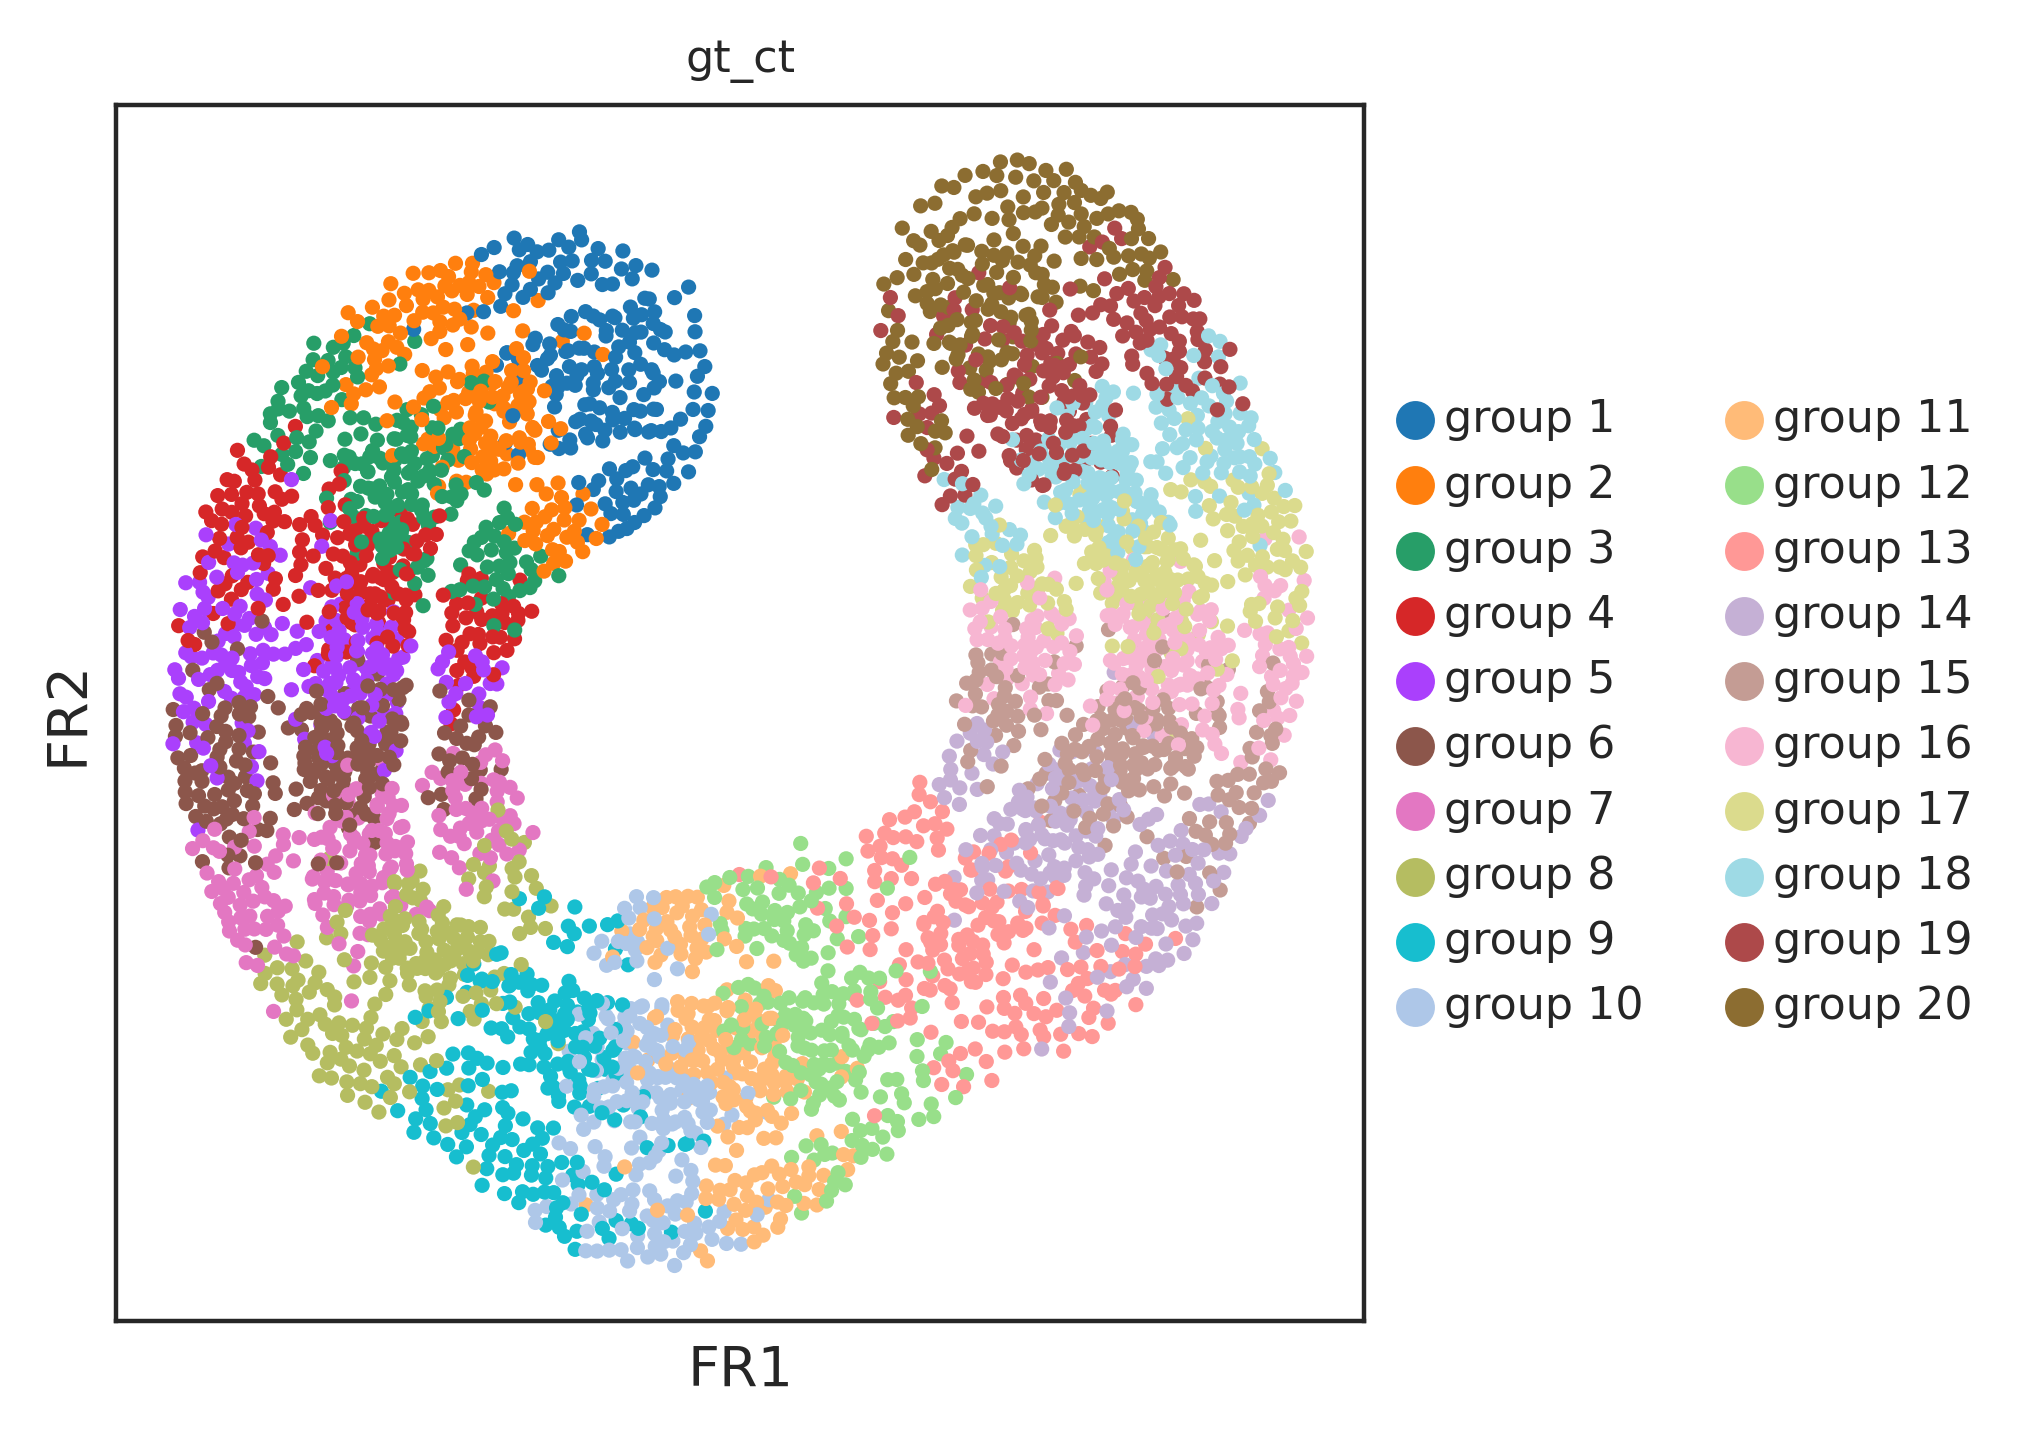

In [18]:
sc.pl.draw_graph(adata,color='gt_ct')

In [24]:
sc.tl.draw_graph(adata,init_pos='paga')

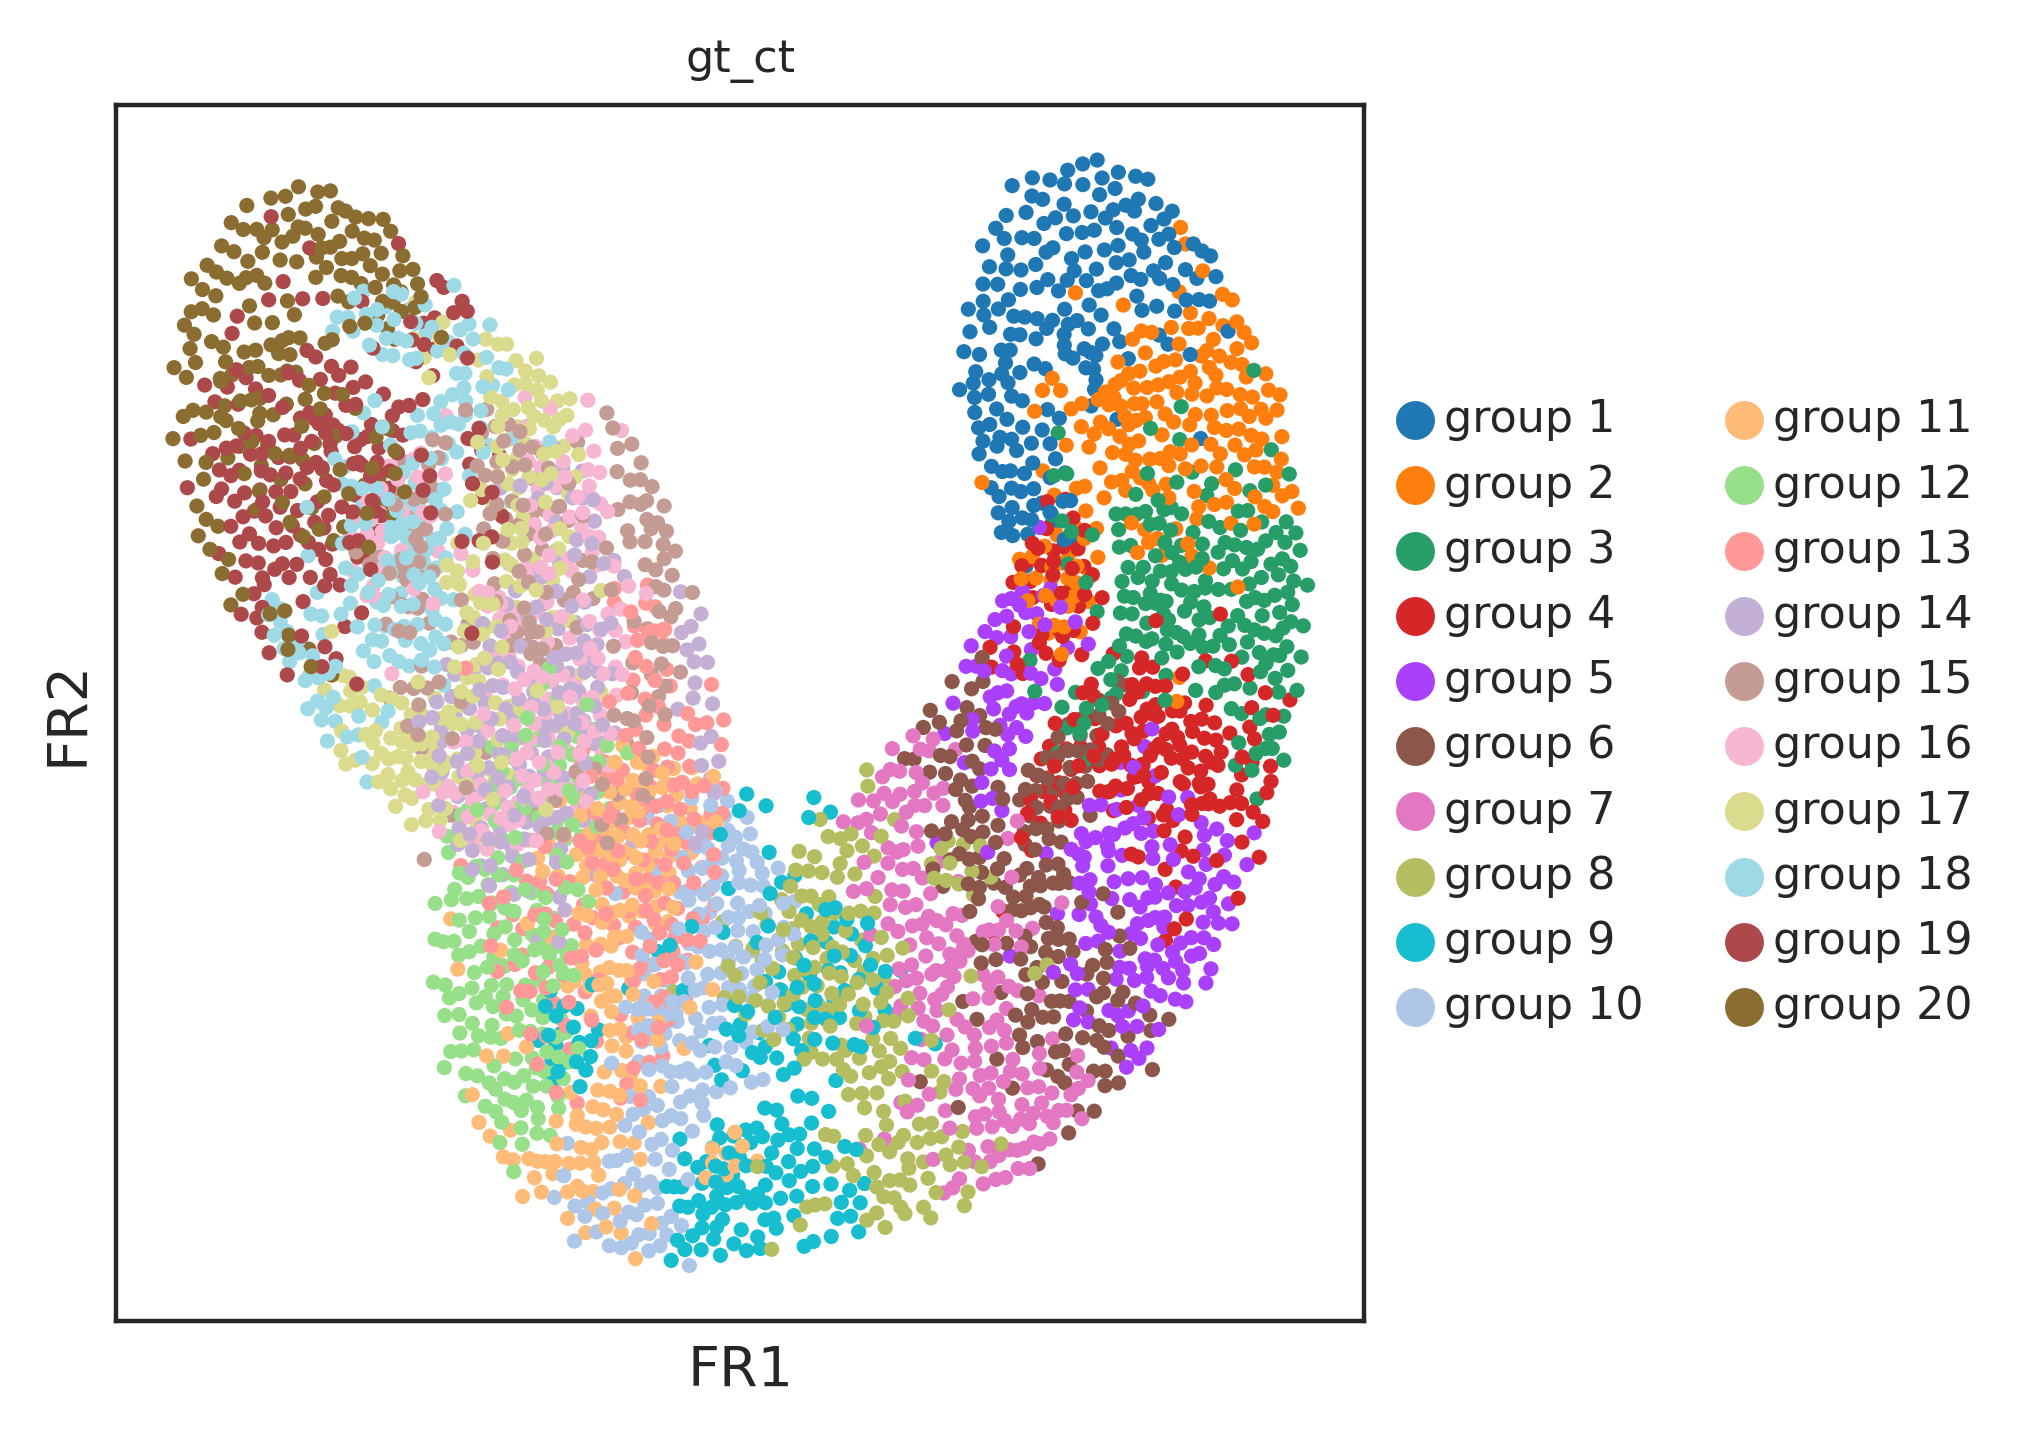

In [25]:
sc.pl.draw_graph(adata,color='gt_ct')

## dpt mat

In [31]:
adata.obsm['X_diffmap'] = adata.obsm['X_pca'].copy()

In [52]:
cls_key = 'gt_ct'
cat = np.array(adata.obs[cls_key].cat.categories)

root_list = np.array(barycenter_list)
root_list = root_list.astype('int')
dpt_mat = np.zeros(shape=(len(cat),len(cat)))
for i in range(len(cat)):
    adata.uns['iroot'] = root_list[i]
    sc.tl.dpt(adata)
    pt_array = np.array(adata.obs['dpt_pseudotime'])
    dpt_mat[i] = pt_array[root_list]


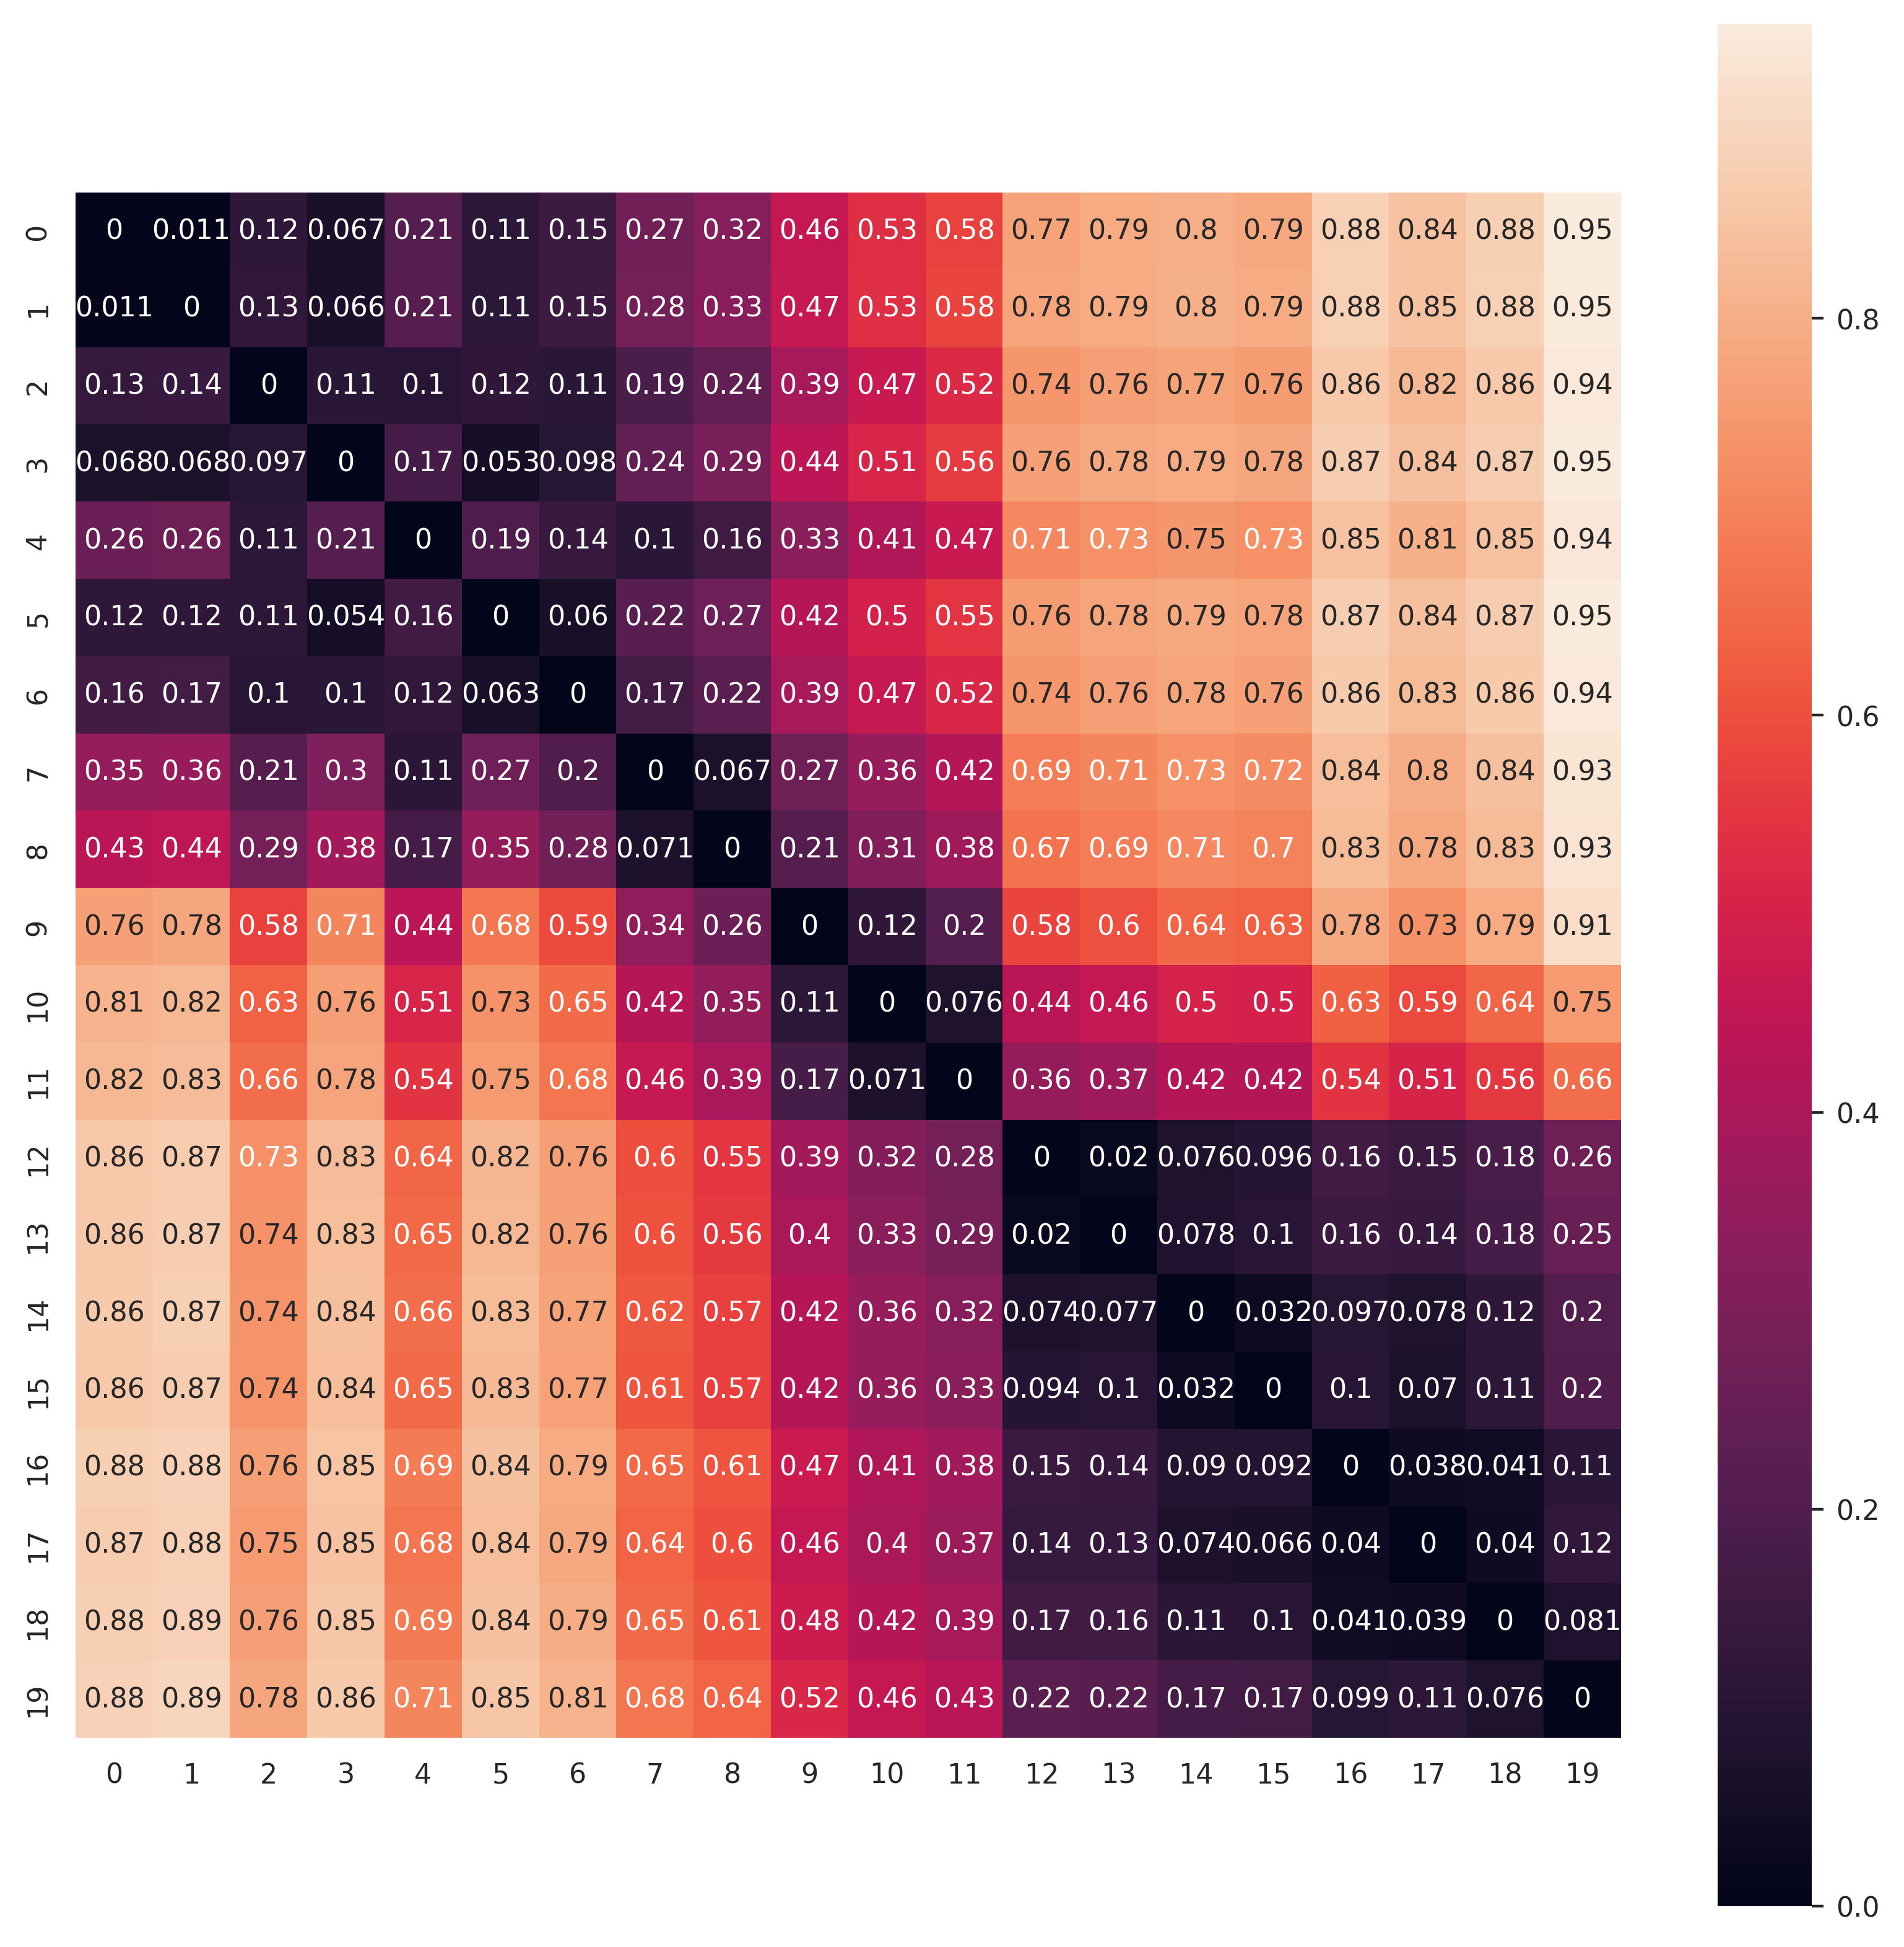

In [70]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dpt_mat,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 

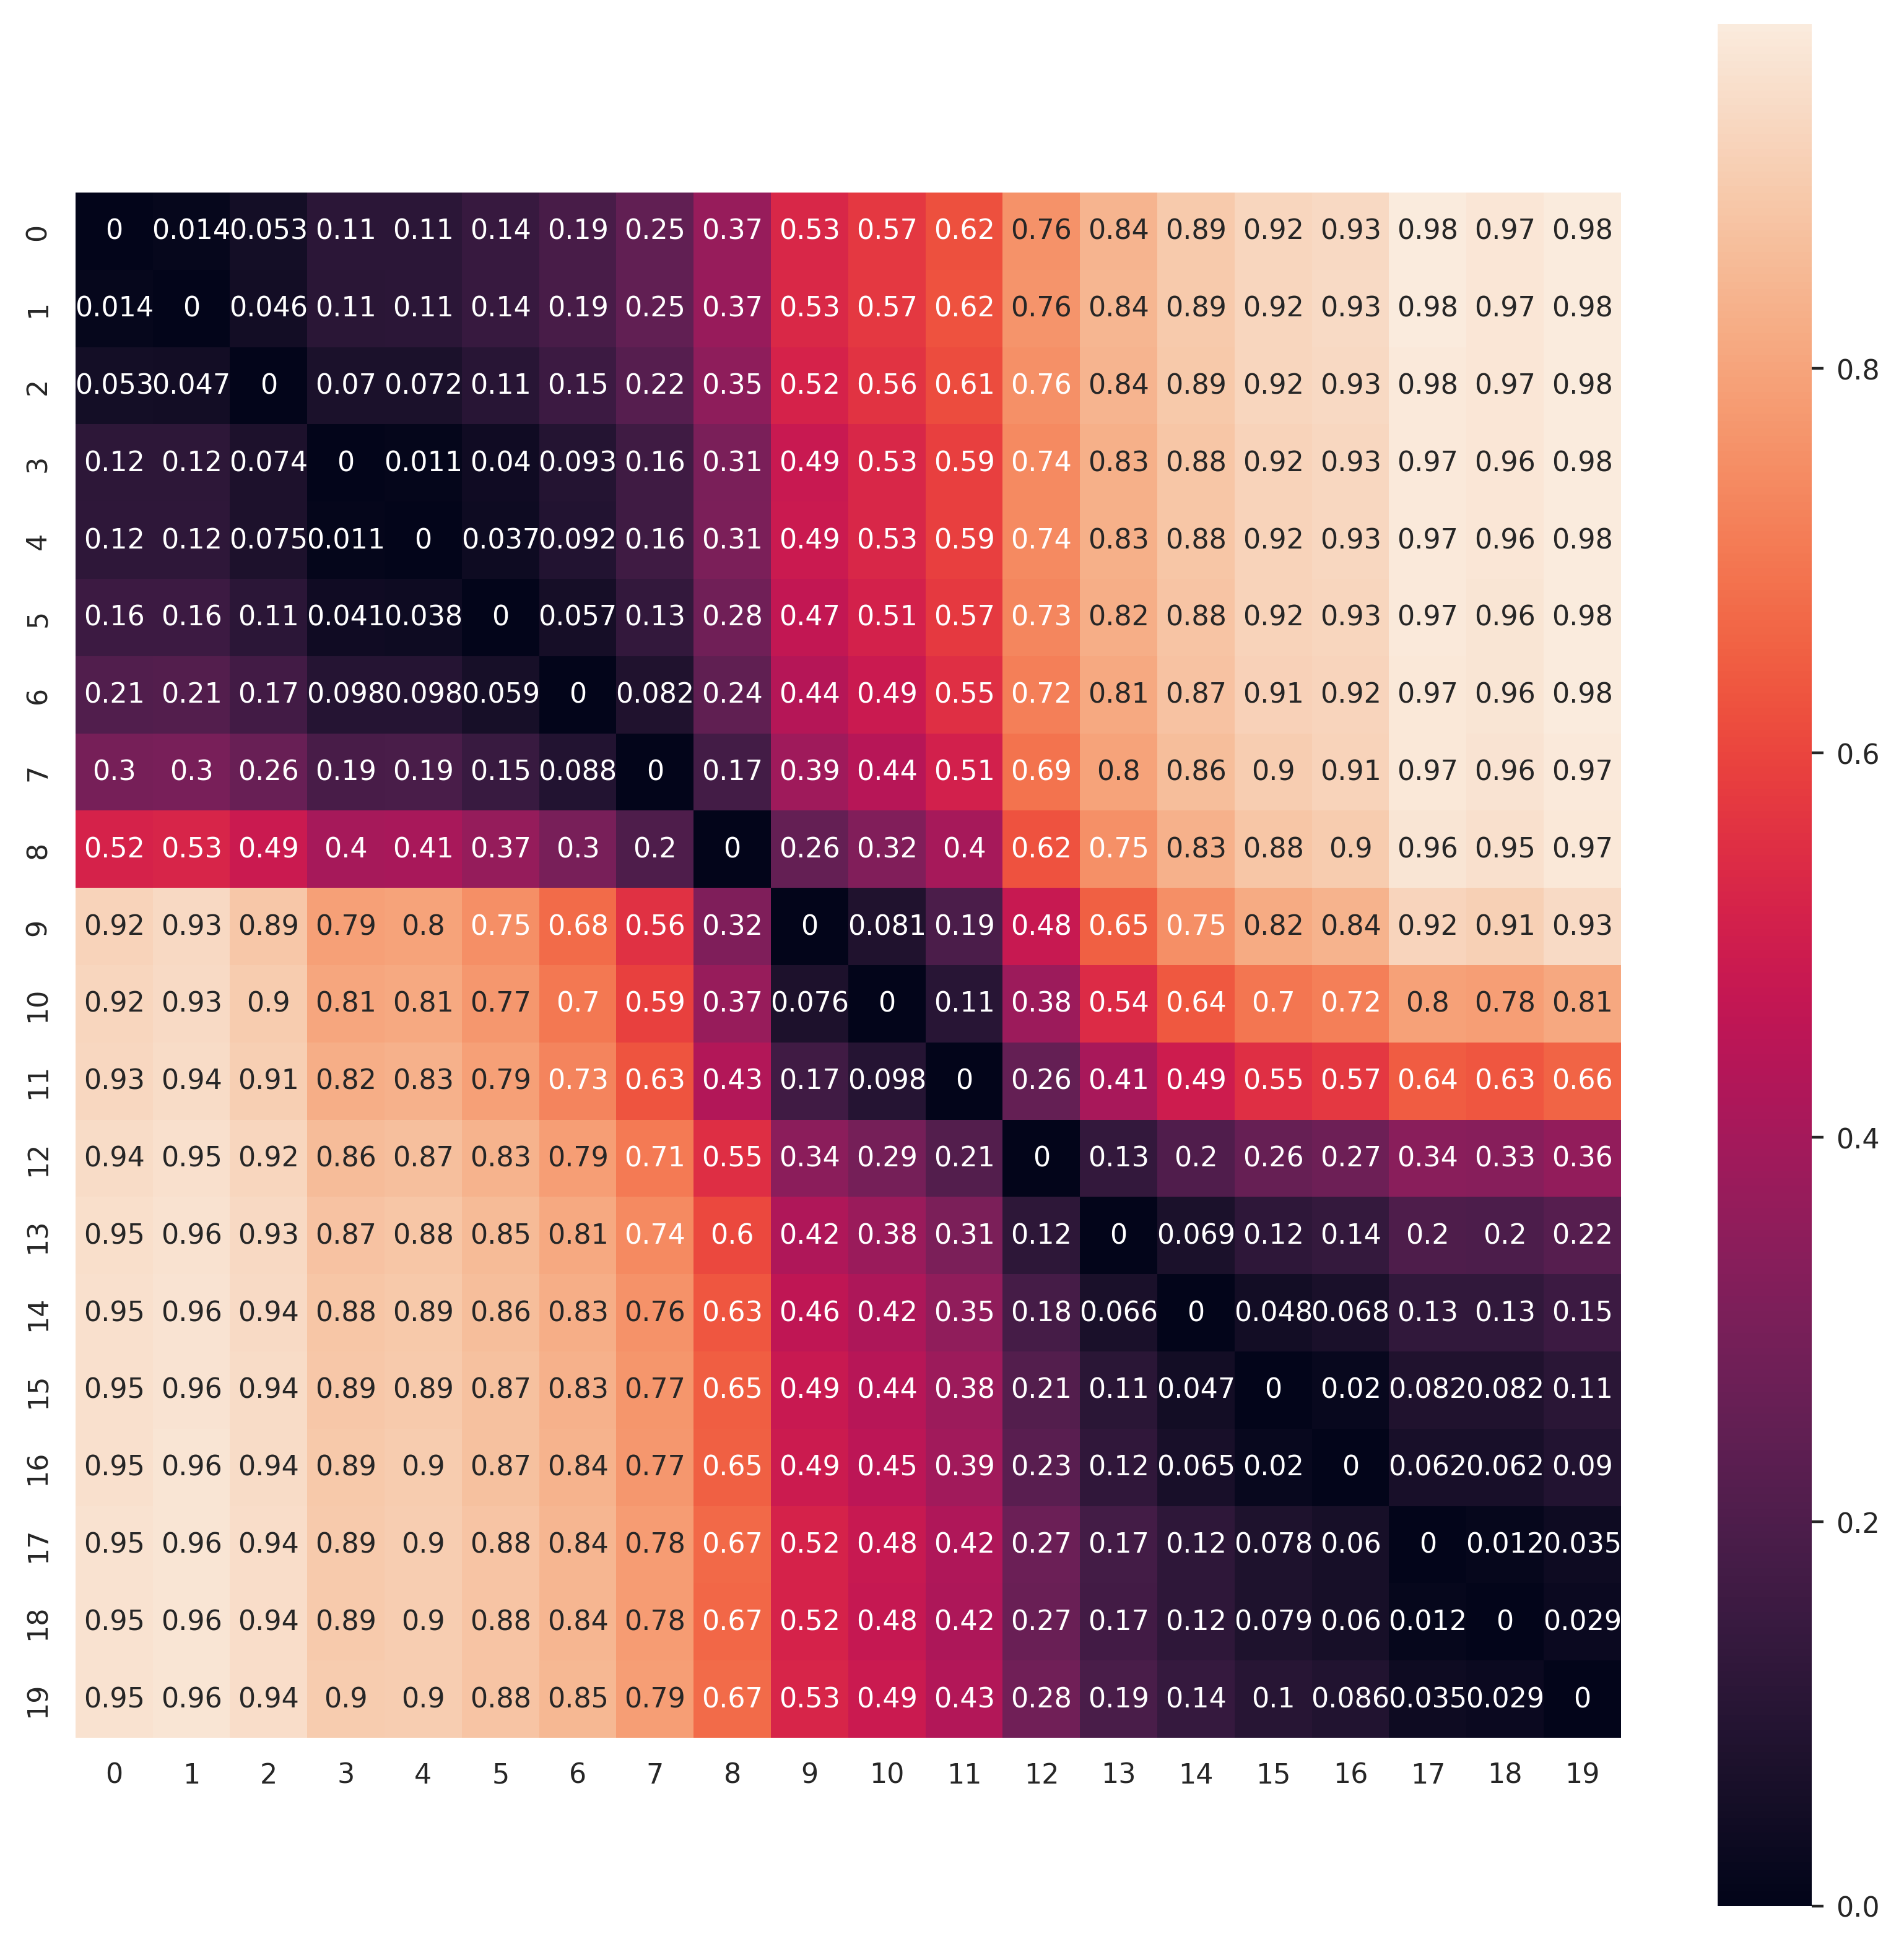

In [53]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dpt_mat,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 

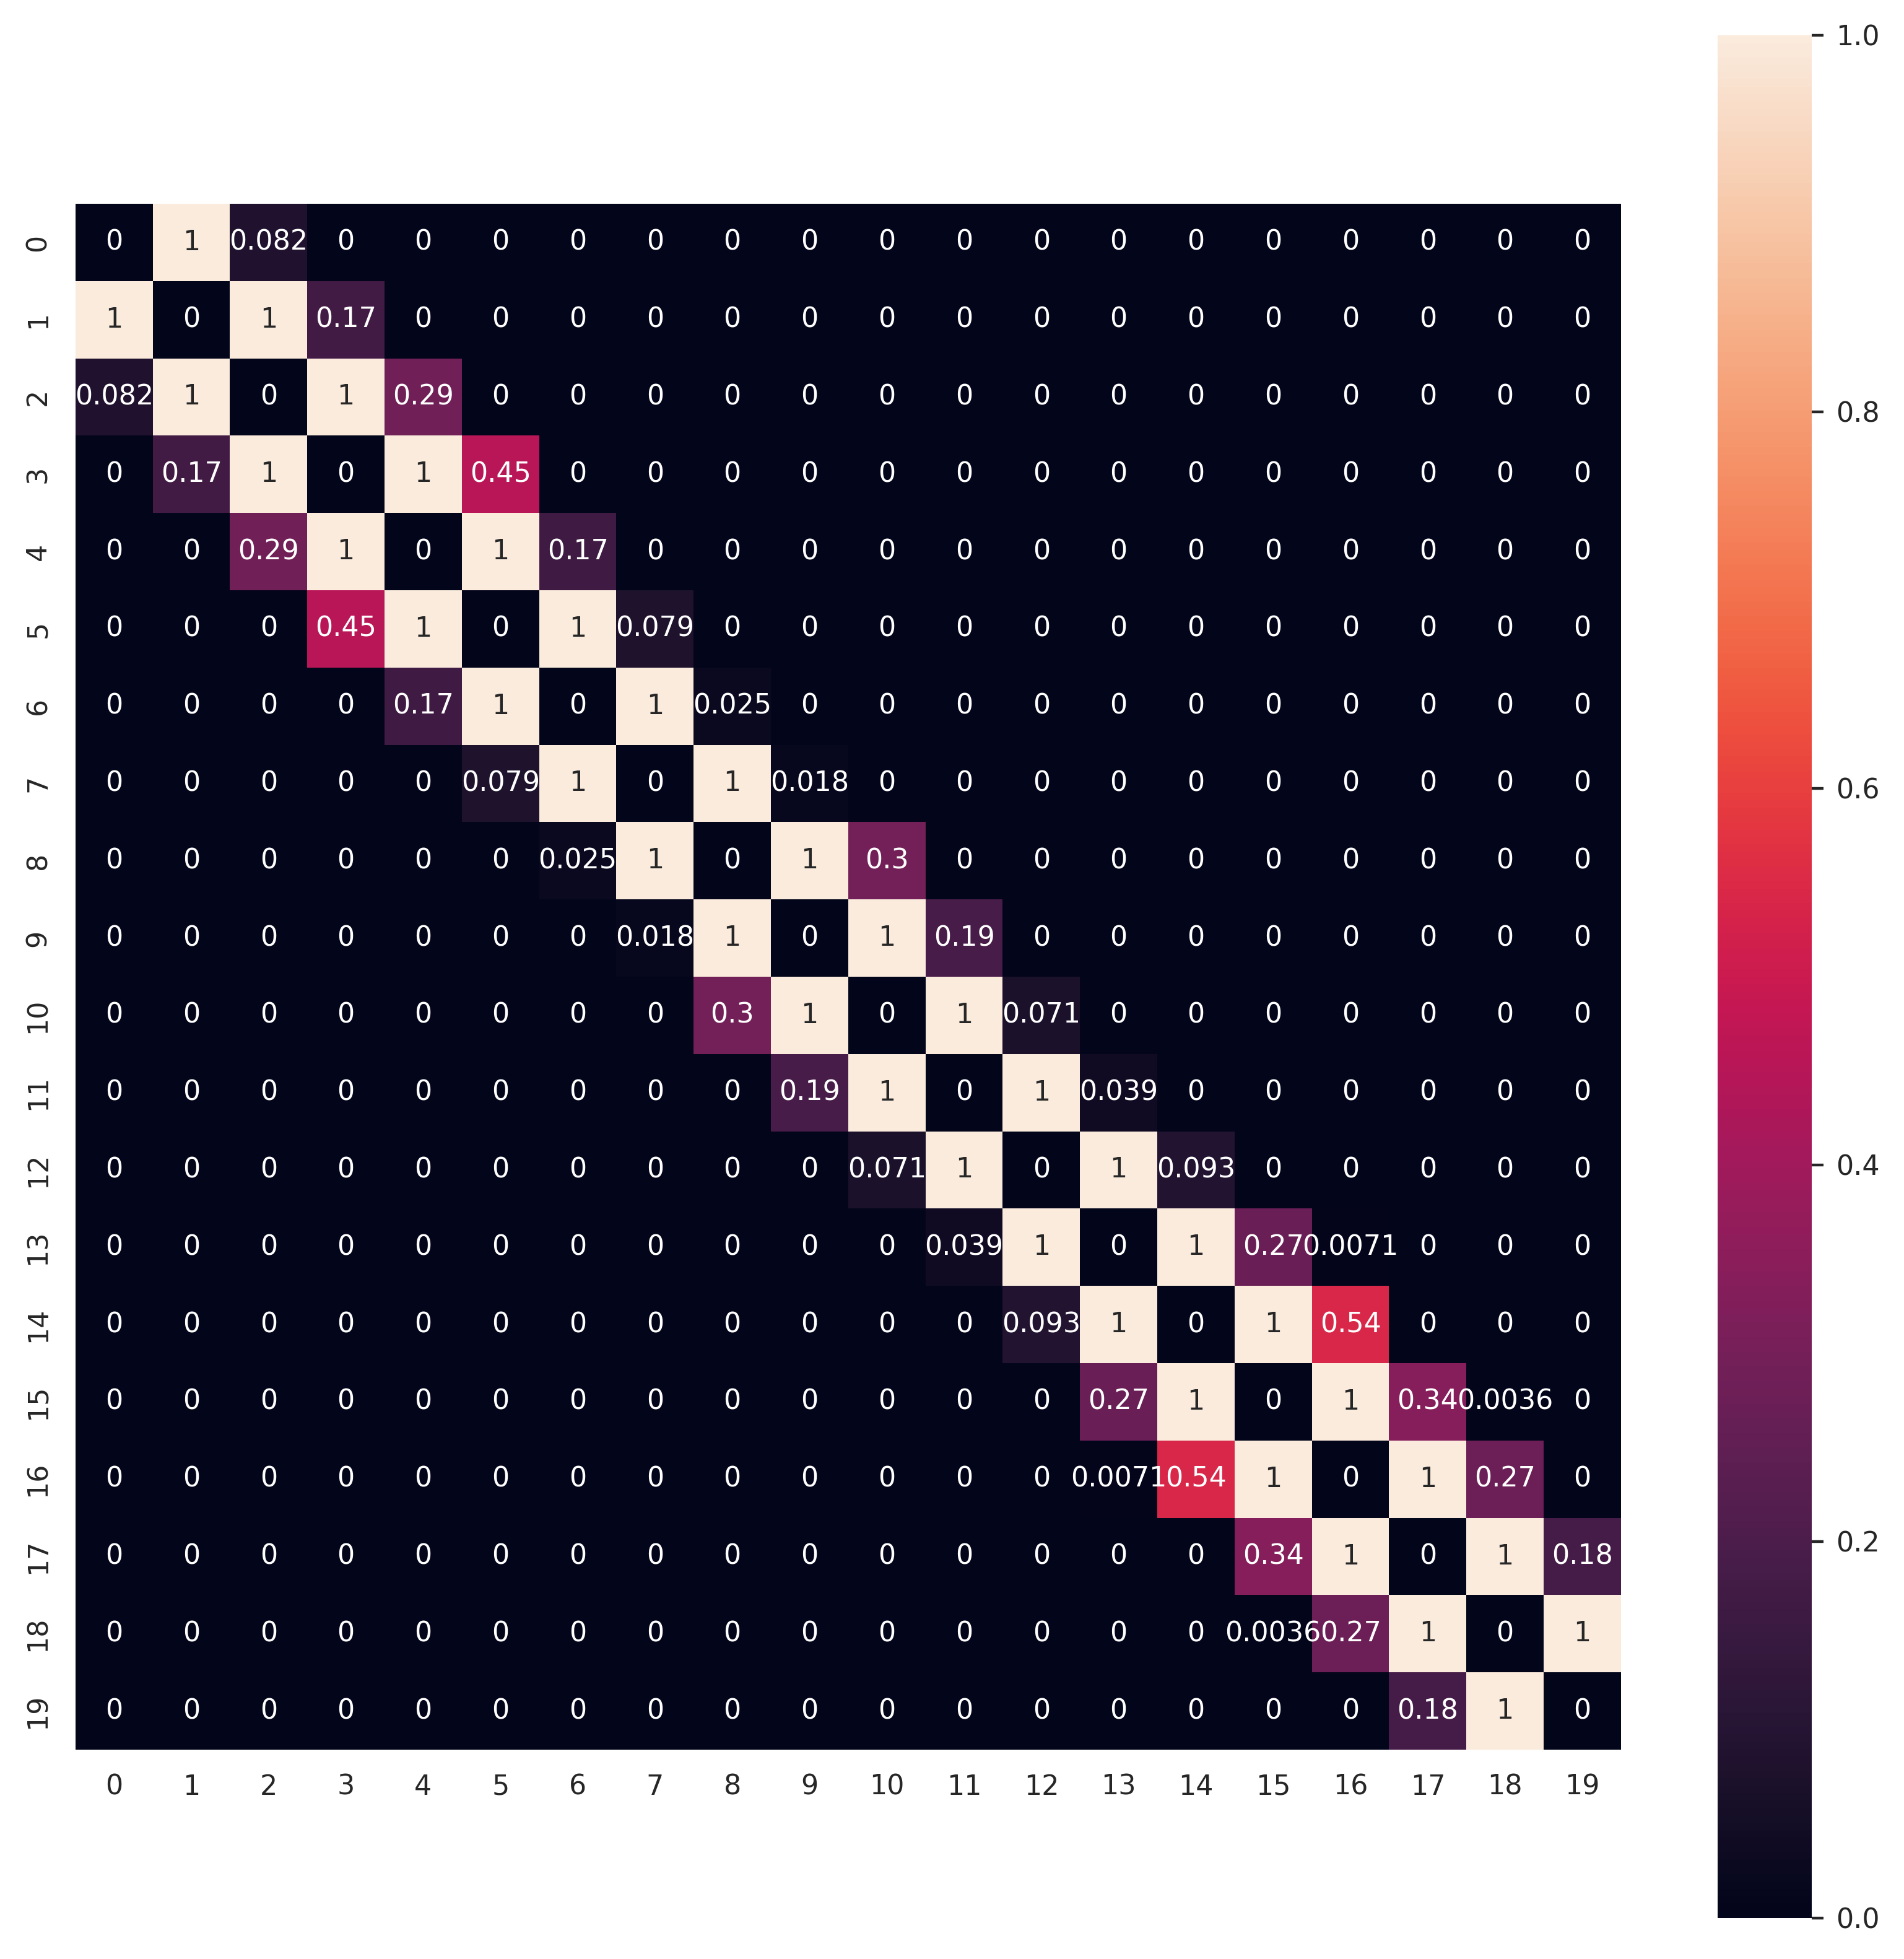

In [60]:
paga_mat = adata.uns['paga']['connectivities'].toarray()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(paga_mat,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 

In [72]:
sc.tl.diffmap(adata,n_comps=500)

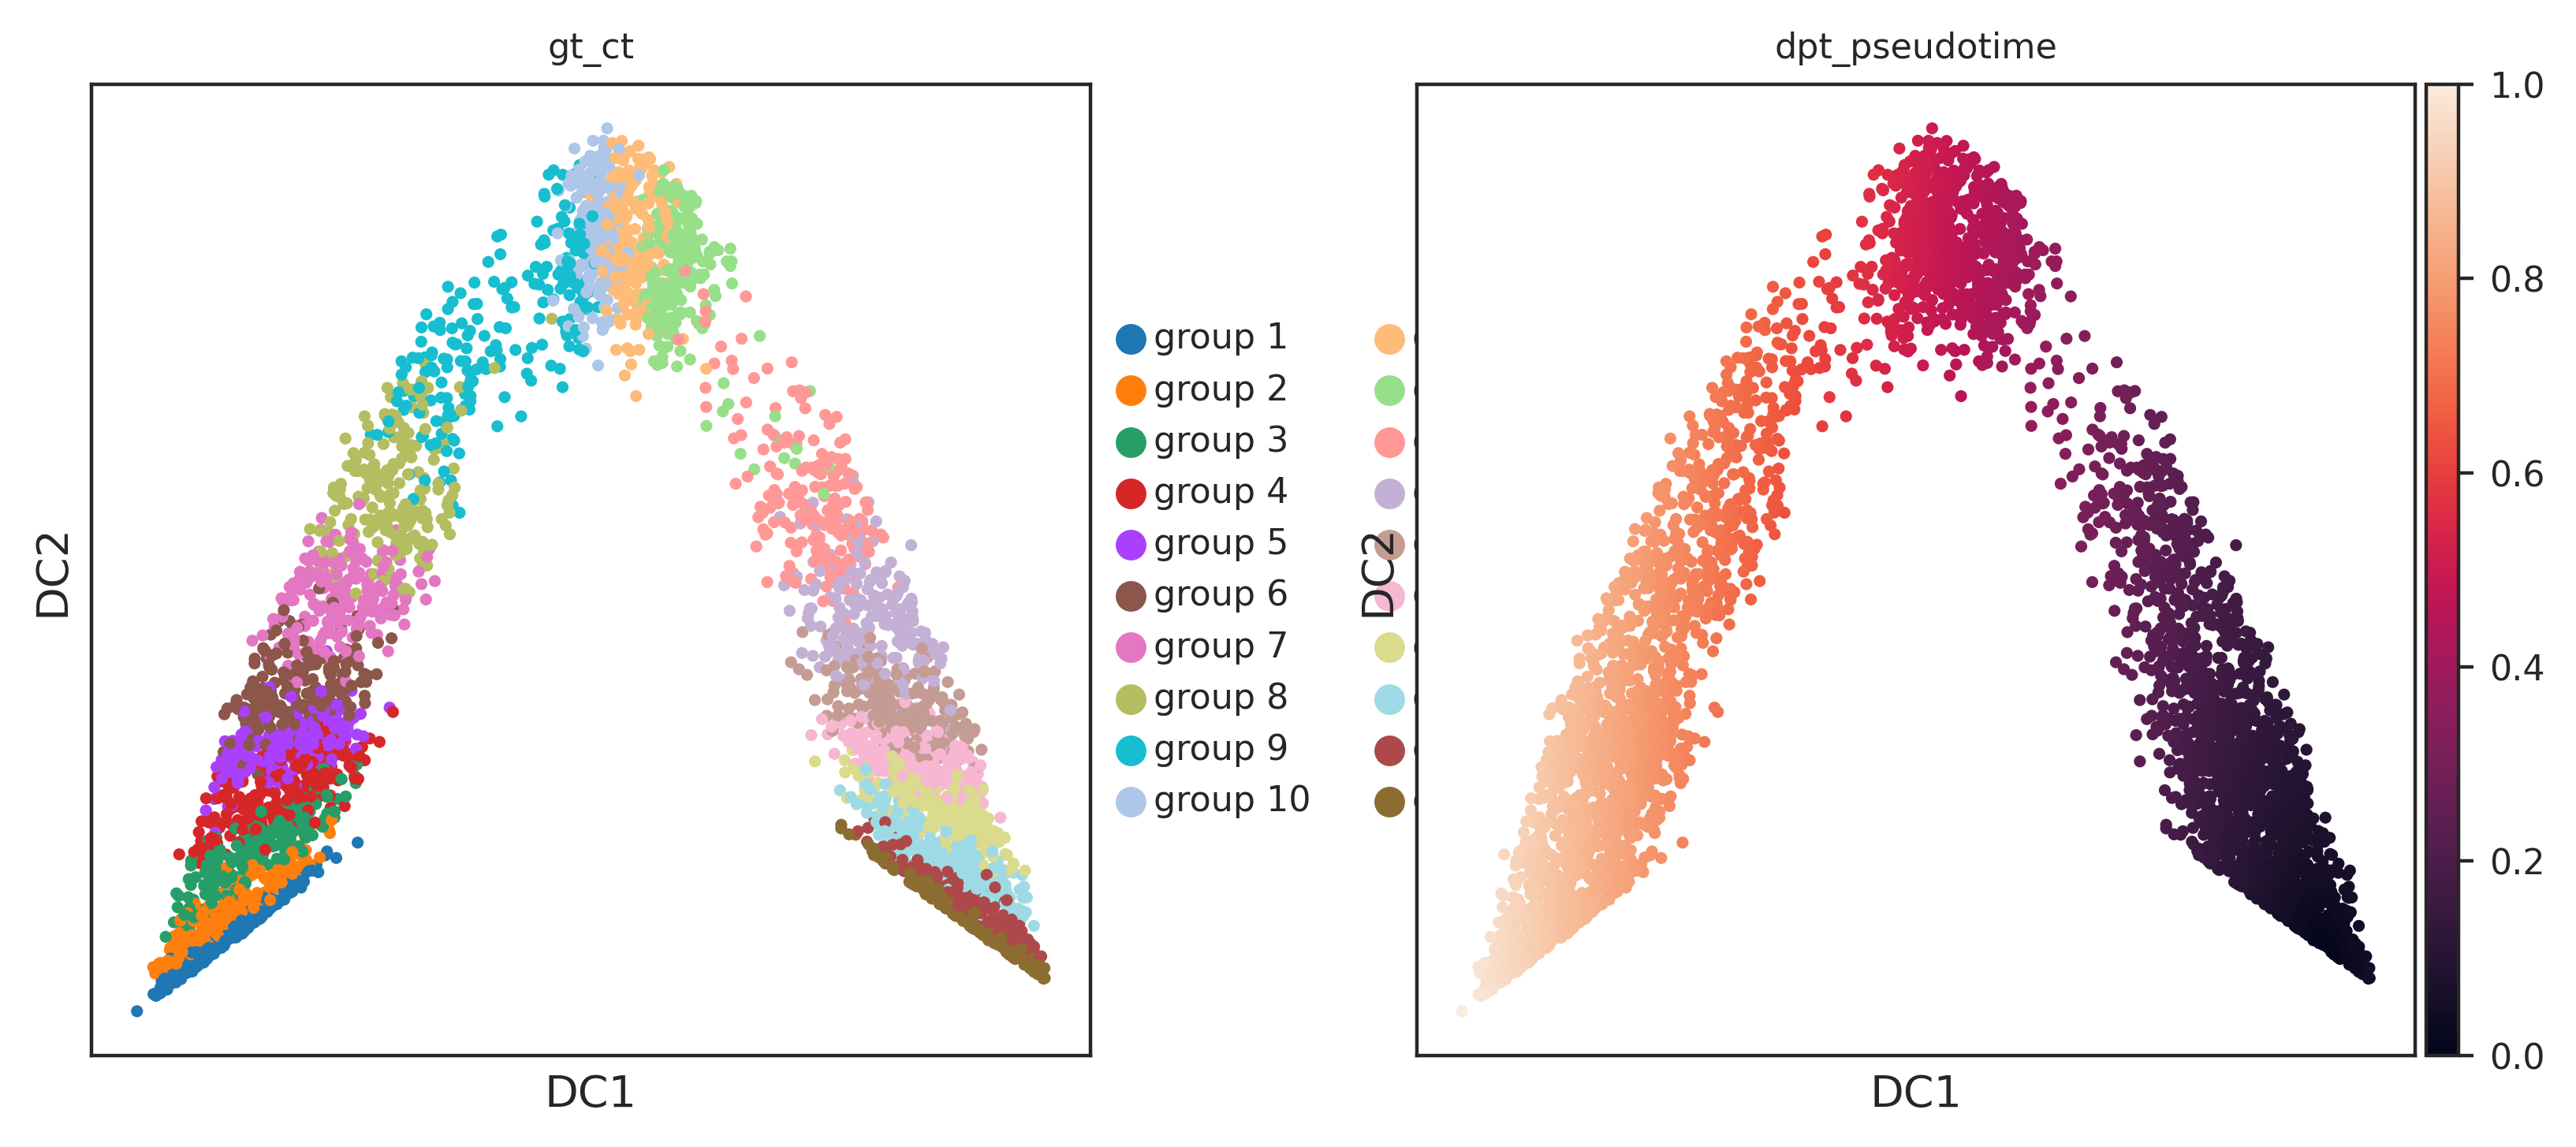

In [73]:
sc.pl.diffmap(adata,color=['gt_ct','dpt_pseudotime'])

### generate paga guided adjacent matrix

In [ ]:
connect_threshold = 0.5
embed_center = adata.uns['paga']['pos']
embed_center_distmat = squareform(pdist(embed_center))

adjacent_paga = adata.uns['paga']['connectivities'].toarray()
adjacent_paga_bool = (adjacent_paga>=connect_threshold).astype('int')



disconnected_cluster_idxs = np.where(np.sum(adjacent_paga_bool,axis=0)==0)[0]
for dis_idx in disconnected_cluster_idxs:
    cur_argmax = np.argmax(adjacent_paga[:,dis_idx])
    adjacent_paga_bool[dis_idx,cur_argmax] = 1
    adjacent_paga_bool[cur_argmax,dis_idx] = 1
    
paga_guided_dist = np.multiply(embed_center_distmat,adjacent_paga_bool)

G = nx.from_numpy_matrix(paga_guided_dist)

len_path = dict(nx.all_pairs_dijkstra_path_length(G))
# ground_distance_mat = np.inf*np.ones(shape=(len(len_path),len(len_path)))
ground_distance_mat = np.zeros_like(paga_guided_dist)
for i in range(ground_distance_mat.shape[0]):
    for j in range(ground_distance_mat.shape[1]):
        ground_distance_mat[i,j] = len_path[i][j]

In [96]:
connect_threshold = 0.5
embed_center = adata.uns['paga']['pos']
embed_center_distmat = squareform(pdist(embed_center))

adjacent_paga = adata.uns['paga']['connectivities'].toarray()
adjacent_paga_bool = (adjacent_paga>=connect_threshold).astype('int')
adjacent_paga_bool[1,0] = 0
adjacent_paga_bool[0,1] = 0


disconnected_cluster_idxs = np.where(np.sum(adjacent_paga_bool,axis=0)==0)[0]
for dis_idx in disconnected_cluster_idxs:
    cur_argmax = np.argmax(adjacent_paga[:,dis_idx])
    adjacent_paga_bool[dis_idx,cur_argmax] = 1
    adjacent_paga_bool[cur_argmax,dis_idx] = 1
    
paga_guided_dist = np.multiply(embed_center_distmat,adjacent_paga_bool)

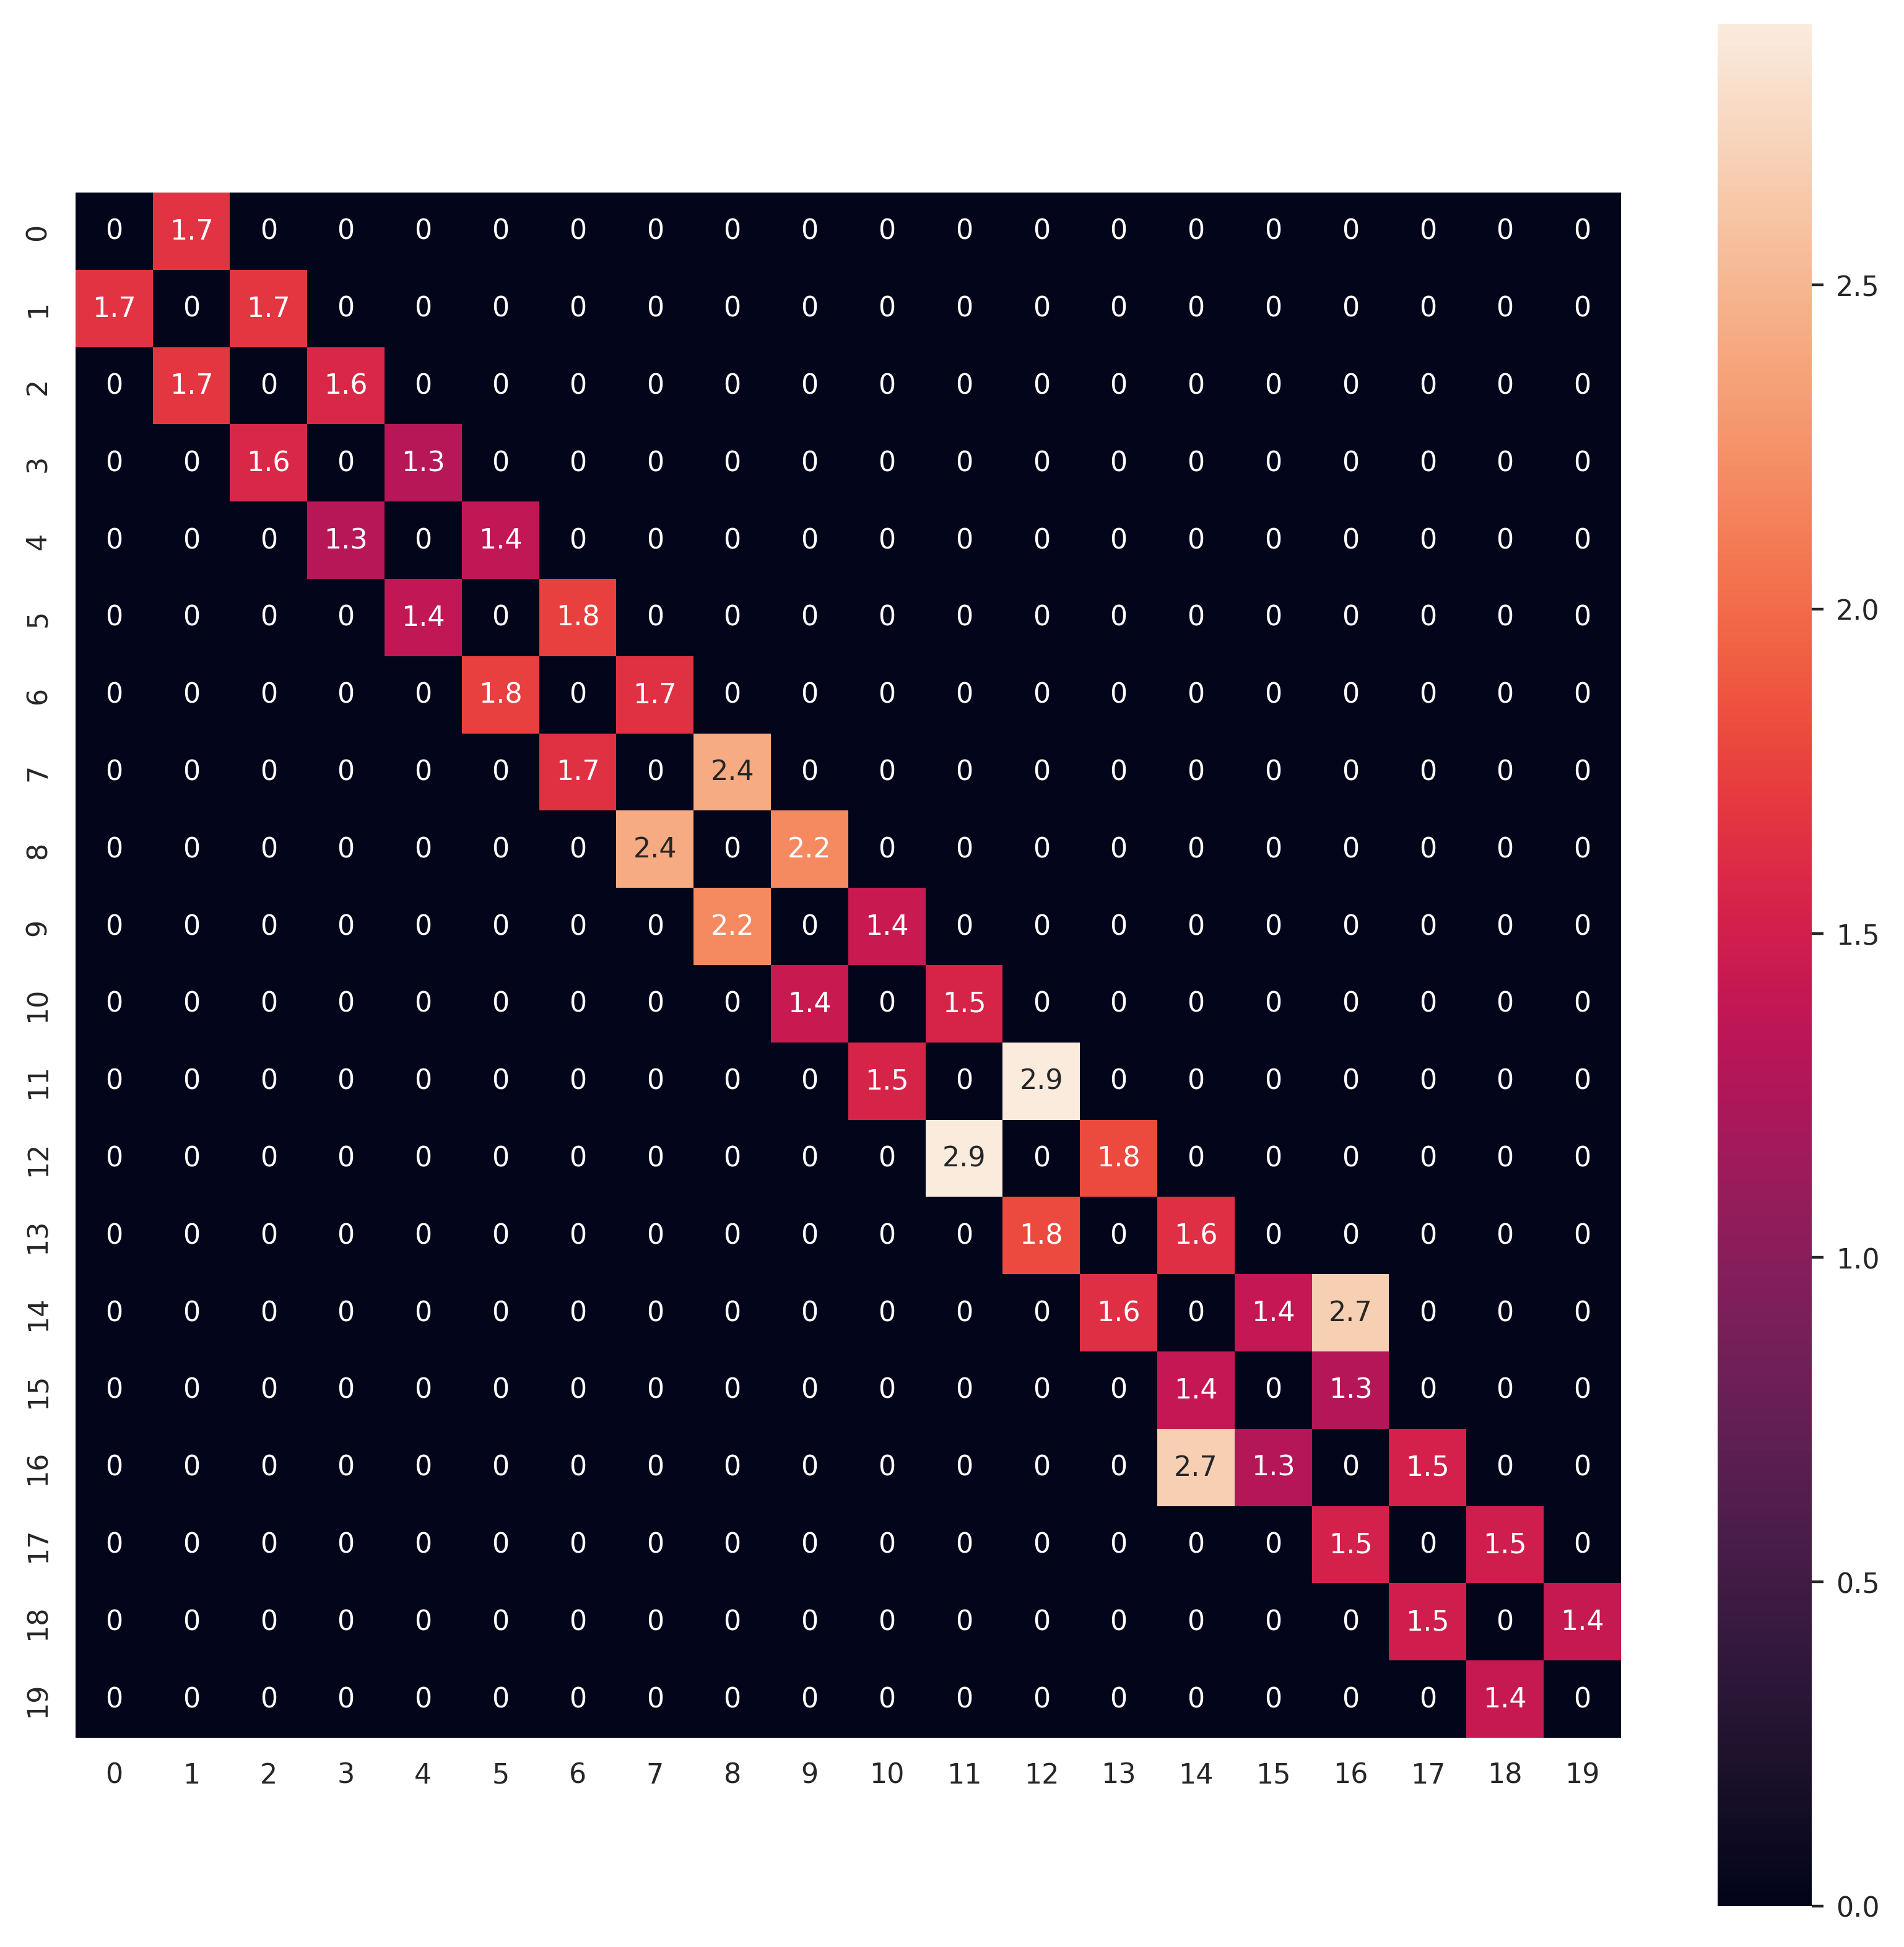

In [97]:
paga_mat = adjacent_paga_bool
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(paga_guided_dist,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 

In [101]:
G = nx.from_numpy_matrix(paga_guided_dist)

len_path = dict(nx.all_pairs_dijkstra_path_length(G))
# ground_distance_mat = np.inf*np.ones(shape=(len(len_path),len(len_path)))
ground_distance_mat = np.zeros_like(paga_guided_dist)
for i in range(ground_distance_mat.shape[0]):
    for j in range(ground_distance_mat.shape[1]):
        ground_distance_mat[i,j] = len_path[i][j]

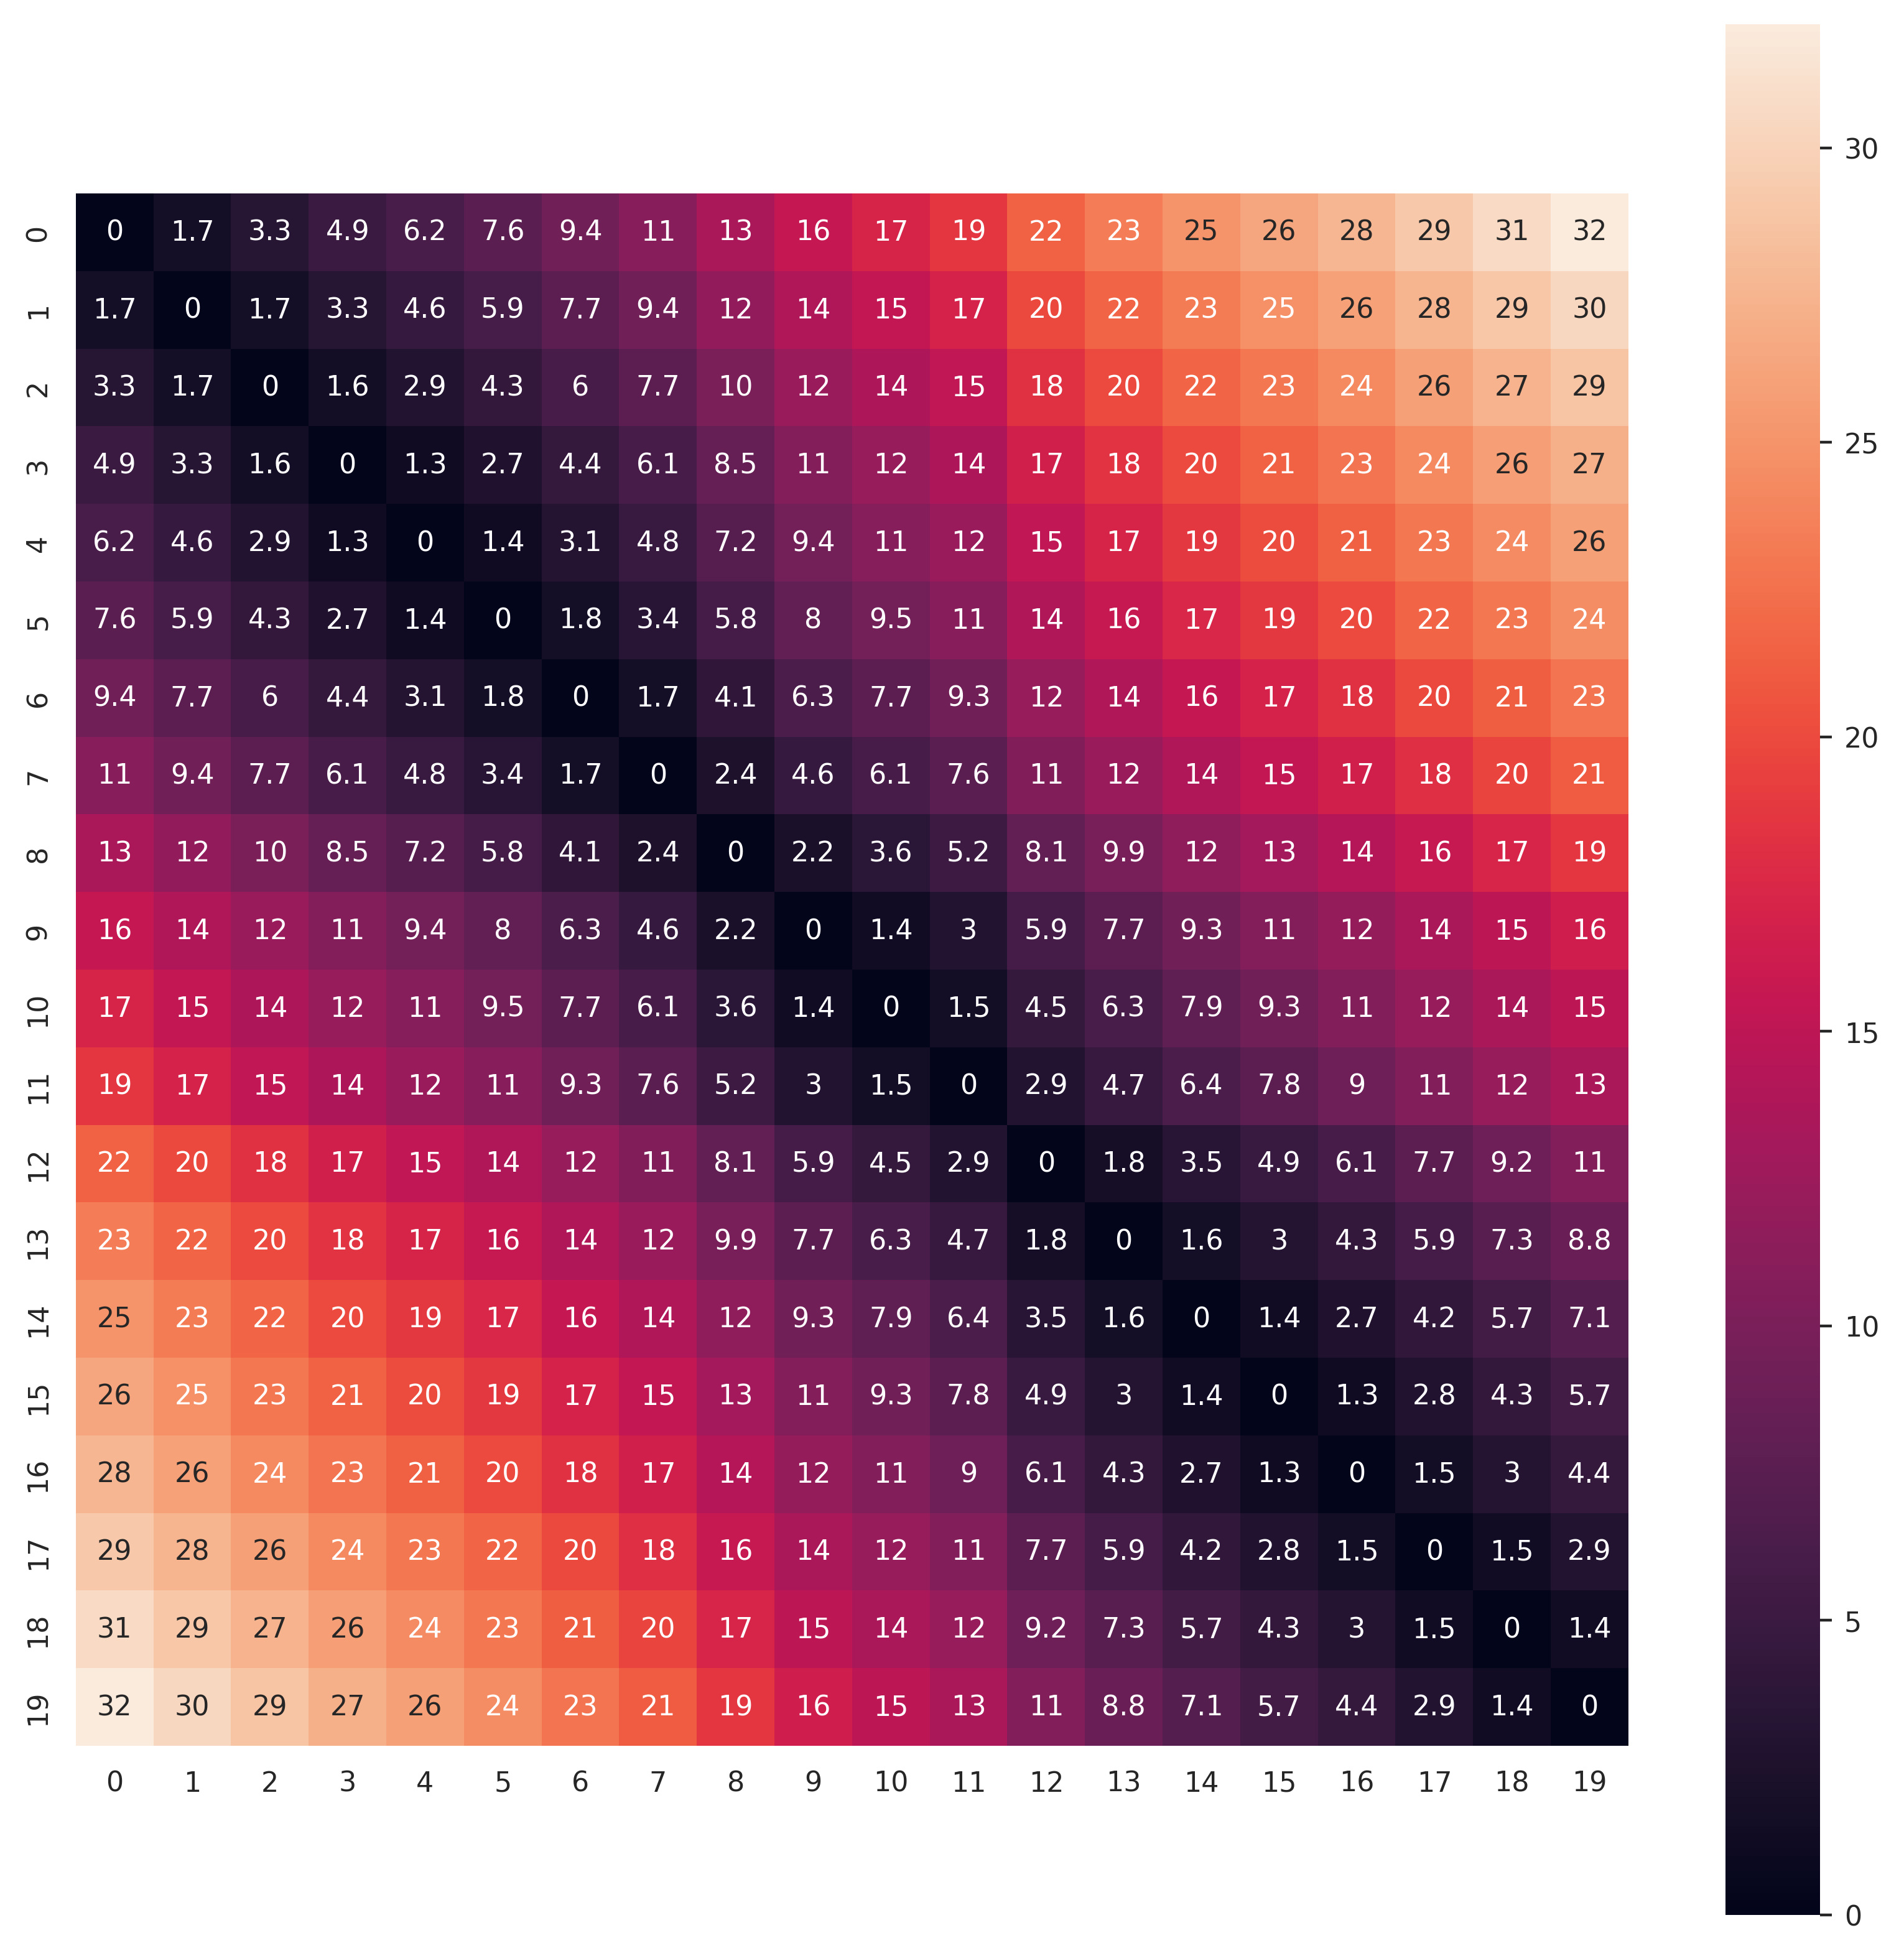

In [102]:
paga_mat = adjacent_paga_bool
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(ground_distance_mat,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 

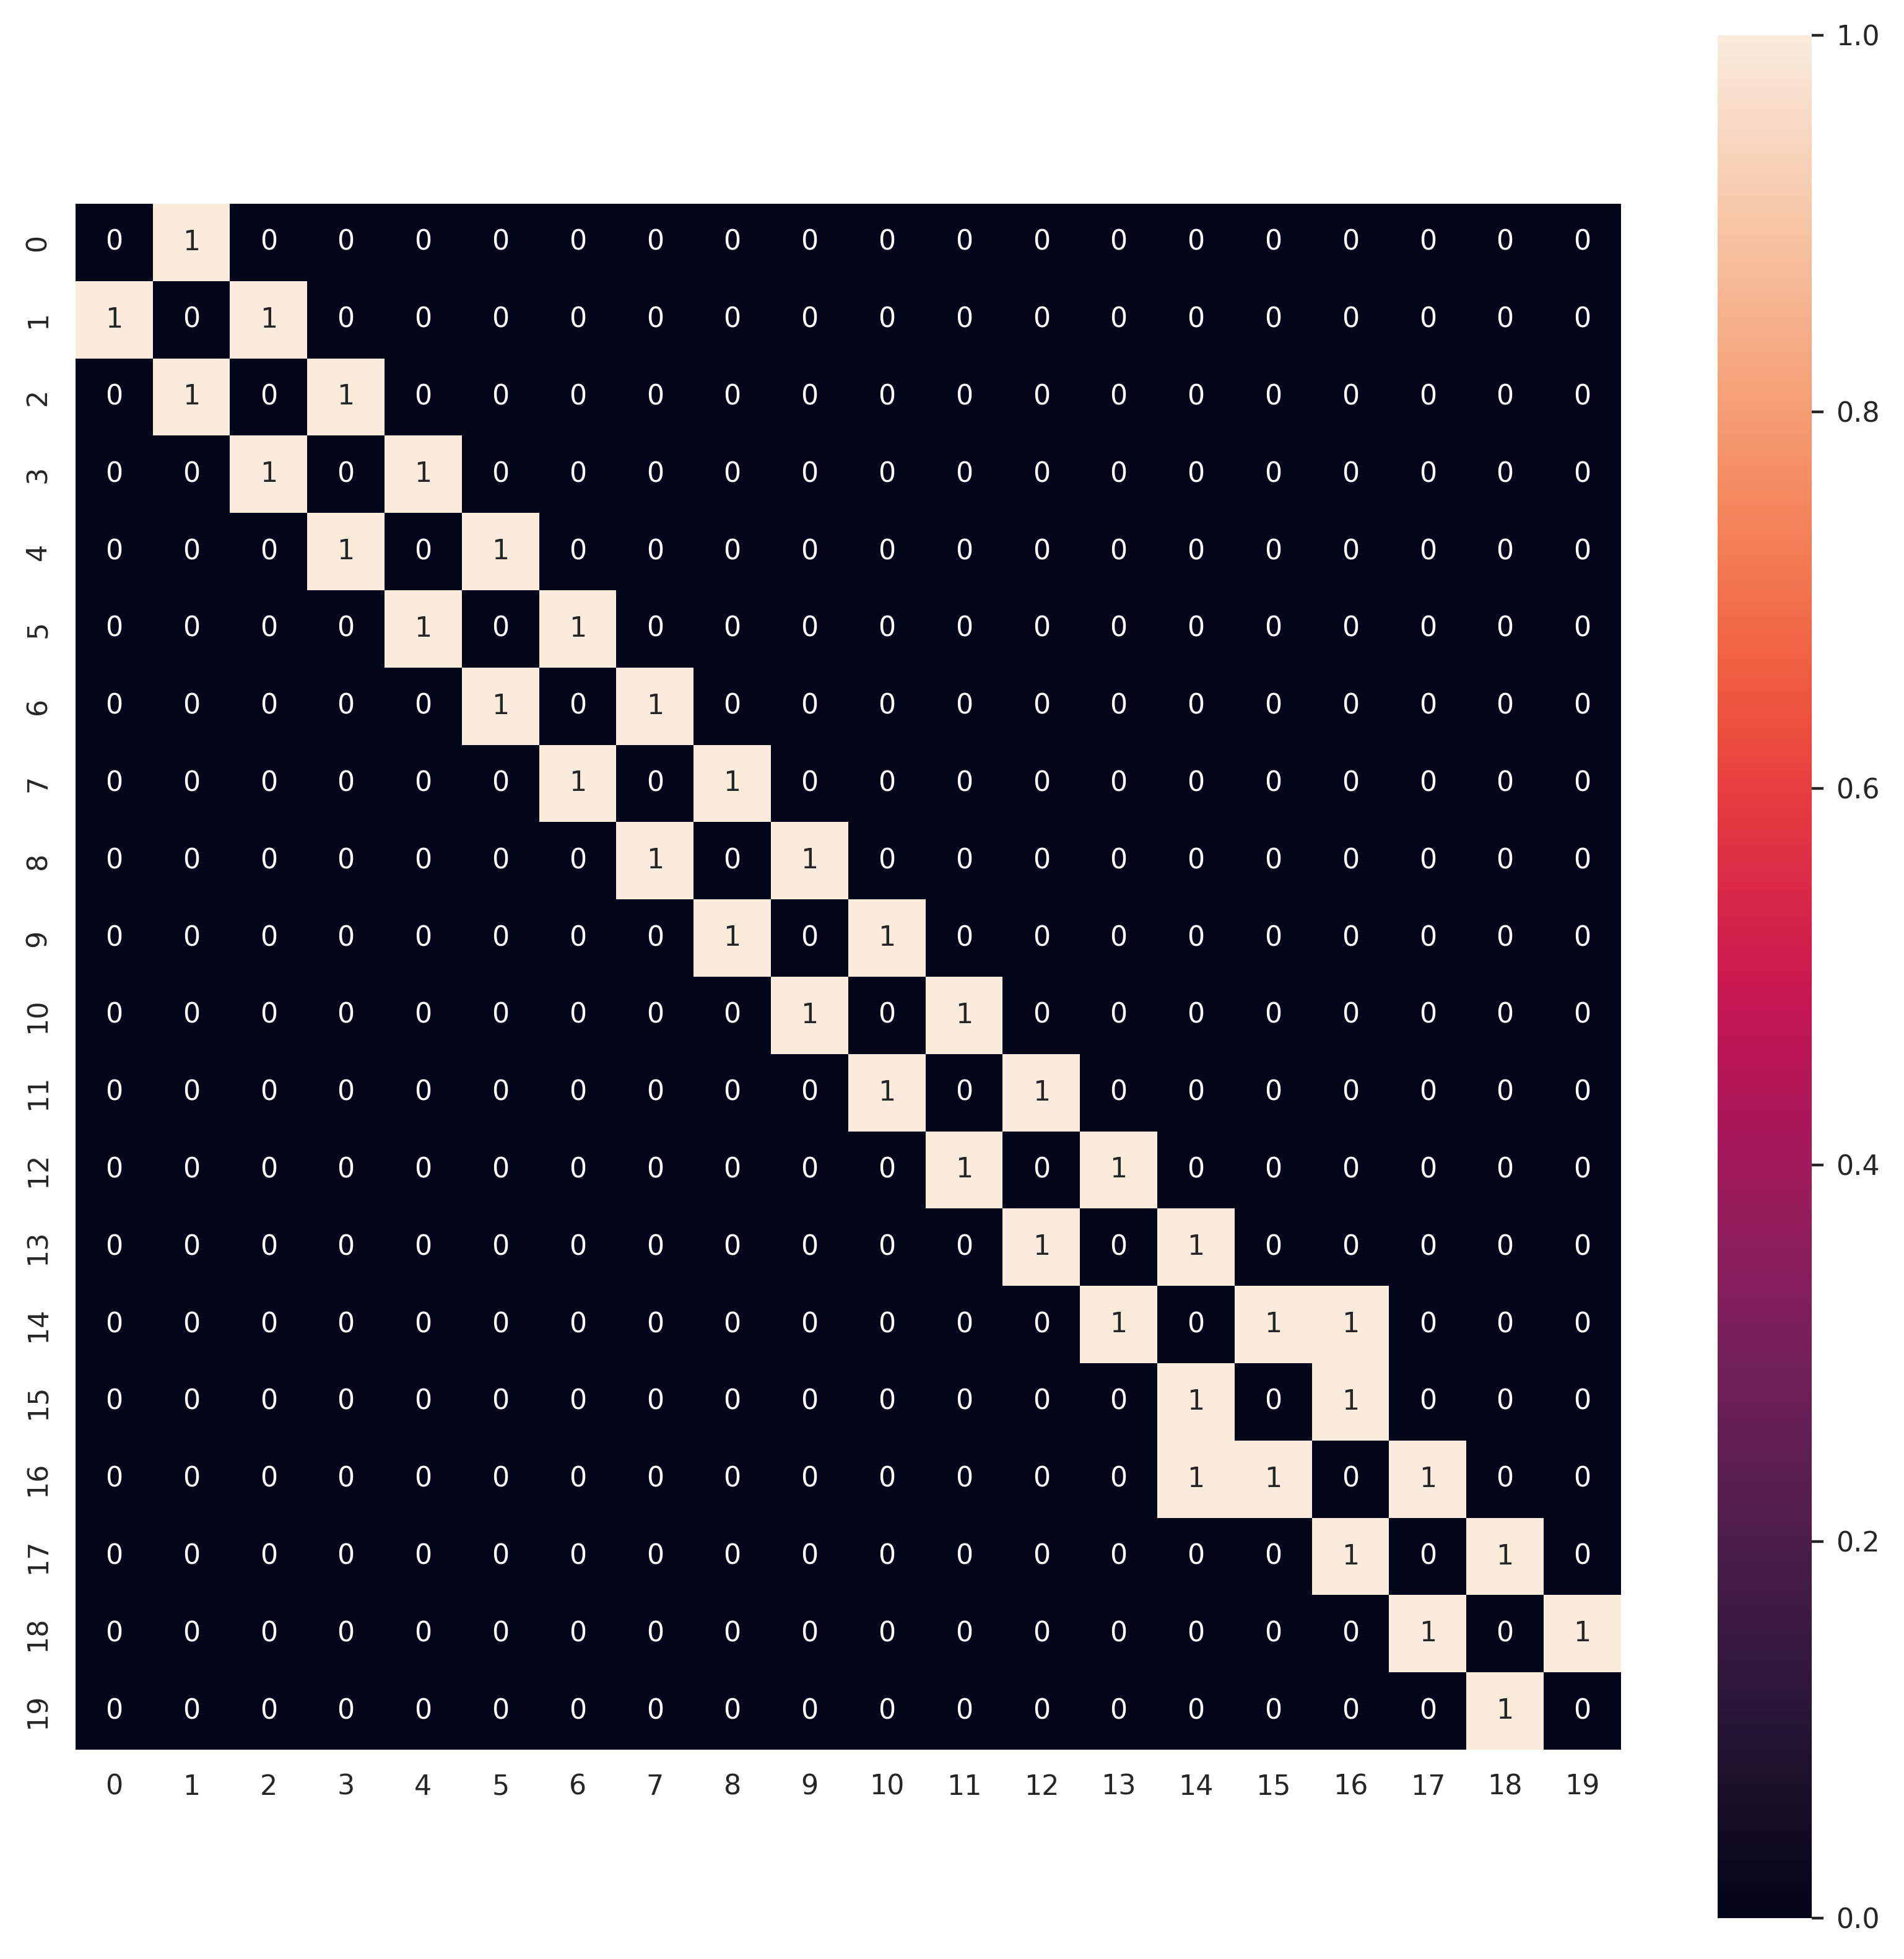

In [89]:
paga_mat = adjacent_paga_bool
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(paga_mat,annot=True,ax=ax)
plt.gca().set_aspect('equal', adjustable='box') 